In [1]:
# !pip3 install pyarrow
# !pip3 install lightgbm
# !pip3 install optuna

In [2]:
import pandas as pd
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

In [3]:
def preprocess(df, year):
    df[['Env', 'Hybrid']] = df['id'].str.split(':', expand=True)
    df['Env'] += "_" + str(year)
    df = df.drop('id', axis=1).set_index(['Env', 'Hybrid'])
    return df

In [4]:
%%time

TRAIN_YEAR = 2020

ytrain = pd.read_csv('../output/ytrain.csv').set_index(['Env', 'Hybrid'])

xtrainAA = pd.read_parquet('../output/kronecker_epi_AA_train.parquet')
xtrainAA = preprocess(xtrainAA, year=TRAIN_YEAR)
xtrainAA.columns = [f'{x}_AA' for x in xtrainAA.columns]

xtrainDD = pd.read_parquet('../output/kronecker_epi_DD_train.parquet')
xtrainDD = preprocess(xtrainDD, year=TRAIN_YEAR)
xtrainDD.columns = [f'{x}_DD' for x in xtrainDD.columns]

xtrainAD = pd.read_parquet('../output/kronecker_epi_AD_train.parquet')
xtrainAD = preprocess(xtrainAD, year=TRAIN_YEAR)
xtrainAD.columns = [f'{x}_AD' for x in xtrainAD.columns]

xtrain = pd.concat([xtrainAA, xtrainDD, xtrainAD], axis=1)
xtrain = xtrain.merge(ytrain, on=['Env', 'Hybrid'], how='inner')
ytrain = xtrain['Yield_Mg_ha']
del xtrain['Yield_Mg_ha'], xtrainAA, xtrainDD, xtrainAD
xtrain

CPU times: user 21min 30s, sys: 6min 33s, total: 28min 4s
Wall time: 28min 13s


weather_station_lat.2369.DK3IIH6_AA  \
Env       Hybrid                                                   
DEH1_2020 B14A/H95                                      0.026453   
          B14A/MO17                                     0.178596   
          B14A/OH43                                     0.031022   
          B37/H95                                       0.462462   
          B37/MO17                                      0.869933   
...                                                          ...   
WIH3_2020 W10004_1123/PHP02                             1.152961   
          W10004_1140/PHP02                             0.868290   
          W10004_1143/PHP02                             0.354637   
          W10004_1146/PHP02                             0.956150   
          W10004_1156/PHP02                             1.157501   

                             weather_station_lat.2369.PHN82_AA  \
Env       Hybrid                                                 
DEH1_2020 B14A/H95                                    0.087934   
          B14A/MO17                                   0.179007   
          B14A/OH43                                   0.190380   
          B37/H95                                     0.775128   
          B37/MO17                                    1.009929   
...                                                        ...   
WIH3_2020 W10004_1123/PHP02                           2.306053   
          W10004_1140/PHP02                           1.812642   
          W10004_1143/PHP02                           0.942718   
          W10004_1146/PHP02                           1.748118   
          W10004_1156/PHP02                           2.466025   

                             weather_station_lat.2369.PHZ51_AA  \
Env       Hybrid                                                 
DEH1_2020 B14A/H95                                    0.067150   
          B14A/MO17                                   0.024634   
          B14A/OH43                                   0.133505   
          B37/H95                                     0.647440   
          B37/MO17                                    0.489978   
...                                                        ...   
WIH3_2020 W10004_1123/PHP02                           0.852553   
          W10004_1140/PHP02                           0.646537   
          W10004_1143/PHP02                           1.325811   
          W10004_1146/PHP02                           0.680707   
          W10004_1156/PHP02                           0.614239   

                             weather_station_lat.2FACC.DK3IIH6_AA  \
Env       Hybrid                                                    
DEH1_2020 B14A/H95                                       0.011281   
          B14A/MO17                                      0.024201   
          B14A/OH43                                      0.009357   
          B37/H95                                        0.103428   
          B37/MO17                                       0.135003   
...                                                           ...   
WIH3_2020 W10004_1123/PHP02                              3.195444   
          W10004_1140/PHP02                              1.756443   
          W10004_1143/PHP02                              1.915482   
          W10004_1146/PHP02                              2.154864   
          W10004_1156/PHP02                              2.358873   

                             weather_station_lat.4N506.DK3IIH6_AA  \
Env       Hybrid                                                    
DEH1_2020 B14A/H95                                       0.010385   
          B14A/MO17                                      0.000455   
          B14A/OH43                                      0.004669   
          B37/H95                                        0.240375   
          B37/MO17                                       0.368954   
...                                          

In [6]:
%%time

VAL_YEAR = 2021

yval = pd.read_csv('../output/yval.csv').set_index(['Env', 'Hybrid'])

xvalAA = pd.read_parquet('../output/kronecker_epi_AA_val.parquet')
xvalAA = preprocess(xvalAA, year=VAL_YEAR)
xvalAA.columns = [f'{x}_AA' for x in xvalAA.columns]

xvalDD = pd.read_parquet('../output/kronecker_epi_DD_val.parquet')
xvalDD = preprocess(xvalDD, year=VAL_YEAR)
xvalDD.columns = [f'{x}_DD' for x in xvalDD.columns]

xvalAD = pd.read_parquet('../output/kronecker_epi_AD_val.parquet')
xvalAD = preprocess(xvalAD, year=VAL_YEAR)
xvalAD.columns = [f'{x}_AD' for x in xvalAD.columns]

xval = pd.concat([xvalAA, xvalDD, xvalAD], axis=1)
xval = xval.merge(yval, on=['Env', 'Hybrid'], how='inner')
yval = xval['Yield_Mg_ha']
del xval['Yield_Mg_ha'], xvalAA, xvalDD, xvalAD
xval

CPU times: user 27min 11s, sys: 10min 24s, total: 37min 36s
Wall time: 37min 47s


weather_station_lat.2369.DK3IIH6_AA  \
Env       Hybrid                                                   
COH1_2021 B73/MO17                                      0.252495   
          B73/PHK76                                     0.291832   
          B73/PHN82                                     2.338221   
          B73/PHZ51                                     0.058118   
          LH145/LH82                                    0.083840   
...                                                          ...   
WIH3_2021 W10004_1123/PHP02                             1.152961   
          W10004_1140/PHP02                             0.868290   
          W10004_1143/PHP02                             0.354637   
          W10004_1146/PHP02                             0.956150   
          W10004_1156/PHP02                             1.157501   

                             weather_station_lat.2369.PHN82_AA  \
Env       Hybrid                                                 
COH1_2021 B73/MO17                                    0.278704   
          B73/PHK76                                   0.239510   
          B73/PHN82                                  14.883543   
          B73/PHZ51                                   0.332801   
          LH145/LH82                                  0.221056   
...                                                        ...   
WIH3_2021 W10004_1123/PHP02                           2.306053   
          W10004_1140/PHP02                           1.812642   
          W10004_1143/PHP02                           0.942718   
          W10004_1146/PHP02                           1.748118   
          W10004_1156/PHP02                           2.466025   

                             weather_station_lat.2369.PHZ51_AA  \
Env       Hybrid                                                 
COH1_2021 B73/MO17                                    0.533002   
          B73/PHK76                                   0.304454   
          B73/PHN82                                   0.321027   
          B73/PHZ51                                  13.312903   
          LH145/LH82                                  0.874143   
...                                                        ...   
WIH3_2021 W10004_1123/PHP02                           0.852553   
          W10004_1140/PHP02                           0.646537   
          W10004_1143/PHP02                           1.325811   
          W10004_1146/PHP02                           0.680707   
          W10004_1156/PHP02                           0.614239   

                             weather_station_lat.2FACC.DK3IIH6_AA  \
Env       Hybrid                                                    
COH1_2021 B73/MO17                                       0.958542   
          B73/PHK76                                      1.199823   
          B73/PHN82                                      0.081711   
          B73/PHZ51                                      1.266515   
          LH145/LH82                                     0.169983   
...                                                           ...   
WIH3_2021 W10004_1123/PHP02                              3.195444   
          W10004_1140/PHP02                              1.756443   
          W10004_1143/PHP02                              1.915482   
          W10004_1146/PHP02                              2.154864   
          W10004_1156/PHP02                              2.358873   

                             weather_station_lat.4N506.DK3IIH6_AA  \
Env       Hybrid                                                    
COH1_2021 B73/MO17                                       0.083391   
          B73/PHK76                                      0.057438   
          B73/PHN82                                      1.416981   
          B73/PHZ51                                      0.007532   
          LH145/LH82                                     0.027293   
...                                          

### Training

In [7]:
# %%time

# NCOLS = xtrain.shape[1]
# print('features:', NCOLS)

# best_params = {'feature_fraction': 0.4953070809776986, 'num_leaves': 247, 
#                'bagging_fraction': 0.9866458243098336, 'lambda_l1': 3.680660098838679, 
#                'lambda_l2': 1.1632141265265e-06, 'n_estimators': 232, 'max_depth': 3}
# model = lgbm.LGBMRegressor(random_state=42, **best_params)
# model.fit(xtrain.iloc[:, :NCOLS], ytrain)

# # predict
# ypred = model.predict(xval.iloc[:, :NCOLS])

# # validate
# df_eval = pd.DataFrame()
# df_eval['Env'] = xval.index.get_level_values(0)
# df_eval['ytrue'] = list(yval)
# df_eval['ypred'] = ypred
# rmse_per_group = df_eval.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['ypred'], squared=False))
# print(rmse_per_group)

# rmse = sum(rmse_per_group) / len(rmse_per_group)
# print('RMSE:', rmse)

In [8]:
# print(r2_score(df_eval['ytrue'], df_eval['ypred']))
# df_eval.plot.scatter('ytrue', 'ypred', figsize=(6, 6));

In [9]:
from sklearn.decomposition import TruncatedSVD

In [10]:
%%time

n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd.fit(xtrain)
print(svd.explained_variance_ratio_.sum())

0.93055311949688
CPU times: user 16min 2s, sys: 36.2 s, total: 16min 38s
Wall time: 16min 42s


In [11]:
%%time

xtrain_svd = pd.DataFrame(svd.transform(xtrain), index=xtrain.index)
xtrain_svd.columns = [f'kron_svd{i}' for i in range(n_components)]

xval_svd = pd.DataFrame(svd.transform(xval), index=xval.index)
xval_svd.columns = [f'kron_svd{i}' for i in range(n_components)]

CPU times: user 2min 57s, sys: 85.7 ms, total: 2min 58s
Wall time: 2min 58s


In [13]:
xtrain_lag = pd.read_csv('../output/xtrain.csv', usecols=lambda x: 'yield_lag' in x or x in ['Env', 'Hybrid']).set_index(['Env', 'Hybrid'])
xval_lag = pd.read_csv('../output/xval.csv', usecols=lambda x: 'yield_lag' in x or x in ['Env', 'Hybrid']).set_index(['Env', 'Hybrid'])
xtrain_svd = xtrain_svd.merge(xtrain_lag, on=['Env', 'Hybrid'], how='inner')
xval_svd = xval_svd.merge(xval_lag, on=['Env', 'Hybrid'], how='inner')

In [14]:
xtrain_svd

kron_svd0     kron_svd1     kron_svd2  \
Env       Hybrid                                                       
DEH1_2020 B14A/H95            227.142566    163.670853    -45.372508   
          B14A/MO17           613.848520    611.275792    -62.272143   
          B14A/OH43           511.075512    423.441118    -85.896880   
          B37/H95             639.997919    511.227329   -247.904060   
          B37/MO17            839.934164    940.755385   -305.229490   
...                                  ...           ...           ...   
WIH3_2020 W10004_1123/PHP02  4022.180602  14842.993978 -14885.602464   
          W10004_1140/PHP02  3128.654340  11811.487161 -11957.994743   
          W10004_1143/PHP02  3279.417579  11240.958200 -11397.804853   
          W10004_1146/PHP02  3229.231620  12263.632598 -12517.968076   
          W10004_1156/PHP02  3330.444140  11898.963010 -11973.882536   

                               kron_svd3    kron_svd4     kron_svd5  \
Env       Hybrid                                                      
DEH1_2020 B14A/H95            -52.885387     3.374465      5.696767   
          B14A/MO17          -134.369798     9.083330     15.667561   
          B14A/OH43          -114.757618     6.738273      8.229132   
          B37/H95            -152.590298    10.880733     20.786202   
          B37/MO17           -178.317349    12.906960     20.737552   
...                                  ...          ...           ...   
WIH3_2020 W10004_1123/PHP02  1243.647264  1425.440286  17101.578438   
          W10004_1140/PHP02   972.220034  1130.014227  13656.786995   
          W10004_1143/PHP02  1011.410195  1109.273430  13047.568145   
          W10004_1146/PHP02  1004.583530  1174.878345  14235.378858   
          W10004_1156/PHP02  1030.508976  1154.713304  13739.560454   

                              kron_svd6    kron_svd7   kron_svd8   kron_svd9  \
Env       Hybrid                                                               
DEH1_2020 B14A/H95          -176.971990  1135.228922   60.861554   40.263896   
          B14A/MO17         -546.184009  3861.706682  216.823242  164.067465   
          B14A/OH43         -332.078931  1784.902558  135.860003   71.859909   
          B37/H95            -19.989882  3398.811334   82.232218   64.537762   
          B37/MO17          -665.796152  4769.797597  189.546736  116.600121   
...                                 ...          ...         ...         ...   
WIH3_2020 W10004_1123/PHP02    1.069914   320.937933 -187.528956  -64.431402   
          W10004_1140/PHP02  -50.264884  -499.458303 -196.633819  -94.849179   
          W10004_1143/PHP02  -85.552059   706.027971 -155.104828  -26.692112   
          W10004_1146/PHP02  -63.453673  -474.336693 -217.136314  -65.799887   
          W10004_1156/PHP02    7.414496  -170.160926 -160.369144  -68.005695   

                             ...  kron_svd96  kron_svd97  kron_svd98  \
Env       Hybrid             ...                                       
DEH1_2020 B14A/H95           ...   19.679941  102.067502 -144.985567   
          B14A/MO17          ... -197.041893 -398.242324   93.985810   
          B14A/OH43          ...  153.010651 -169.806689  370.971938   
          B37/H95            ... -133.771622  148.166487 -400.312318   
          B37/MO17           ...  246.181253  225.616803 -185.574718   
...                          ...         ...         ...         ...   
WIH3_2020 W10004_1123/PHP02  ...  251.723557  287.988296   71.106365   
          W10004_1140/PHP02  ... -188.156016   50.046731  910.055602   
          W10004_1143/PHP02  ... -613.212977  313.101982  444.825108   
          W10004_1146/PHP02  ... -338.605342  220.758859 -163.849332   
          W10004_1156/PHP02  ... -364.144352  -11.080994  381.171748   

                             kron_svd99  mean_yield_lag_2  min_yield_lag_2  \
Env       Hybrid                                                             
DEH1_2020 B14A/H95           -47.901

In [15]:
import optuna

In [16]:
def objective(trial):
    """
    https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258
    """
    params = {

#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.0, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 6),
        'deterministic': True,
        'random_state': 42
    }
    
    model2 = lgbm.LGBMRegressor(**params)
    model2.fit(xtrain_svd, ytrain)

    # predict
    ypred2 = model2.predict(xval_svd)

    # validate
    df_eval2 = pd.DataFrame()
    df_eval2['Env'] = xval_svd.index.get_level_values(0)
    df_eval2['ytrue'] = list(yval)
    df_eval2['ypred'] = ypred2
    rmse_per_group2 = df_eval2.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['ypred'], squared=False))
    # print(rmse_per_group2)

    rmse2 = sum(rmse_per_group2) / len(rmse_per_group2)
    return rmse2


study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=200)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best RMSE:', study.best_value)

[I 2023-02-13 15:12:29,140] A new study created in memory with name: no-name-15de7a45-7011-4df9-8963-3b74d82629f8


[LightGBM] [Warning] lambda_l1 is set=0.0024430162614261413, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024430162614261413
[LightGBM] [Warning] bagging_fraction is set=0.839196365086843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.839196365086843
[LightGBM] [Warning] feature_fraction is set=0.3745401188473625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3745401188473625
[LightGBM] [Warning] lambda_l2 is set=2.5361081166471375e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5361081166471375e-07


[I 2023-02-13 15:12:29,706] Trial 0 finished with value: 2.321135475299017 and parameters: {'feature_fraction': 0.3745401188473625, 'num_leaves': 244, 'bagging_fraction': 0.839196365086843, 'lambda_l1': 0.0024430162614261413, 'lambda_l2': 2.5361081166471375e-07, 'n_estimators': 55, 'max_depth': 2}. Best is trial 0 with value: 2.321135475299017.


[LightGBM] [Warning] lambda_l1 is set=1.5320059381854043e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5320059381854043e-08
[LightGBM] [Warning] bagging_fraction is set=0.8248435466776274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8248435466776274
[LightGBM] [Warning] feature_fraction is set=0.8661761457749352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8661761457749352
[LightGBM] [Warning] lambda_l2 is set=5.360294728728285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.360294728728285


[I 2023-02-13 15:12:31,037] Trial 1 finished with value: 2.2878604820968613 and parameters: {'feature_fraction': 0.8661761457749352, 'num_leaves': 155, 'bagging_fraction': 0.8248435466776274, 'lambda_l1': 1.5320059381854043e-08, 'lambda_l2': 5.360294728728285, 'n_estimators': 252, 'max_depth': 3}. Best is trial 1 with value: 2.2878604820968613.


[LightGBM] [Warning] lambda_l1 is set=0.00052821153945323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00052821153945323
[LightGBM] [Warning] bagging_fraction is set=0.5825453457757226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5825453457757226
[LightGBM] [Warning] feature_fraction is set=0.18182496720710062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18182496720710062
[LightGBM] [Warning] lambda_l2 is set=7.71800699380605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.71800699380605e-05


[I 2023-02-13 15:12:31,603] Trial 2 finished with value: 2.2666859053045845 and parameters: {'feature_fraction': 0.18182496720710062, 'num_leaves': 48, 'bagging_fraction': 0.5825453457757226, 'lambda_l1': 0.00052821153945323, 'lambda_l2': 7.71800699380605e-05, 'n_estimators': 94, 'max_depth': 5}. Best is trial 2 with value: 2.2666859053045845.


[LightGBM] [Warning] lambda_l1 is set=0.00012724181576752517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012724181576752517
[LightGBM] [Warning] bagging_fraction is set=0.619817105976215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.619817105976215
[LightGBM] [Warning] feature_fraction is set=0.13949386065204183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13949386065204183
[LightGBM] [Warning] lambda_l2 is set=0.1165691561324743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1165691561324743


[I 2023-02-13 15:12:31,992] Trial 3 finished with value: 2.247574075817737 and parameters: {'feature_fraction': 0.13949386065204183, 'num_leaves': 76, 'bagging_fraction': 0.619817105976215, 'lambda_l1': 0.00012724181576752517, 'lambda_l2': 0.1165691561324743, 'n_estimators': 68, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=3.425445902633376e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.425445902633376e-07
[LightGBM] [Warning] bagging_fraction is set=0.764526911140863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.764526911140863
[LightGBM] [Warning] feature_fraction is set=0.5924145688620425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5924145688620425
[LightGBM] [Warning] lambda_l2 is set=3.850031979199519e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.850031979199519e-08


[I 2023-02-13 15:12:33,663] Trial 4 finished with value: 2.3073908904273996 and parameters: {'feature_fraction': 0.5924145688620425, 'num_leaves': 13, 'bagging_fraction': 0.764526911140863, 'lambda_l1': 3.425445902633376e-07, 'lambda_l2': 3.850031979199519e-08, 'n_estimators': 286, 'max_depth': 6}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.014391207615728067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014391207615728067
[LightGBM] [Warning] bagging_fraction is set=0.45860326840383037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45860326840383037
[LightGBM] [Warning] feature_fraction is set=0.8083973481164611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8083973481164611
[LightGBM] [Warning] lambda_l2 is set=9.148975058772307e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.148975058772307e-05


[I 2023-02-13 15:12:34,224] Trial 5 finished with value: 2.300887181541875 and parameters: {'feature_fraction': 0.8083973481164611, 'num_leaves': 79, 'bagging_fraction': 0.45860326840383037, 'lambda_l1': 0.014391207615728067, 'lambda_l2': 9.148975058772307e-05, 'n_estimators': 45, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.009176996354542699, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009176996354542699
[LightGBM] [Warning] bagging_fraction is set=0.5552679889600102, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5552679889600102
[LightGBM] [Warning] feature_fraction is set=0.034388521115218396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.034388521115218396
[LightGBM] [Warning] lambda_l2 is set=6.388511557344611e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.388511557344611e-06


[I 2023-02-13 15:12:34,681] Trial 6 finished with value: 2.2521677562104094 and parameters: {'feature_fraction': 0.034388521115218396, 'num_leaves': 233, 'bagging_fraction': 0.5552679889600102, 'lambda_l1': 0.009176996354542699, 'lambda_l2': 6.388511557344611e-06, 'n_estimators': 161, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=2.854239907497756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.854239907497756
[LightGBM] [Warning] bagging_fraction is set=0.8650796940166687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650796940166687
[LightGBM] [Warning] feature_fraction is set=0.18485445552552704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18485445552552704
[LightGBM] [Warning] lambda_l2 is set=1.1309571585271483, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1309571585271483


[I 2023-02-13 15:12:35,723] Trial 7 finished with value: 2.2596491481555834 and parameters: {'feature_fraction': 0.18485445552552704, 'num_leaves': 249, 'bagging_fraction': 0.8650796940166687, 'lambda_l1': 2.854239907497756, 'lambda_l2': 1.1309571585271483, 'n_estimators': 183, 'max_depth': 6}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=8.471746987003668e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.471746987003668e-06
[LightGBM] [Warning] bagging_fraction is set=0.4271363733463229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4271363733463229
[LightGBM] [Warning] feature_fraction is set=0.0884925020519195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0884925020519195
[LightGBM] [Warning] lambda_l2 is set=3.148441347423712e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.148441347423712e-05


[I 2023-02-13 15:12:36,229] Trial 8 finished with value: 2.269733265283128 and parameters: {'feature_fraction': 0.0884925020519195, 'num_leaves': 51, 'bagging_fraction': 0.4271363733463229, 'lambda_l1': 8.471746987003668e-06, 'lambda_l2': 3.148441347423712e-05, 'n_estimators': 88, 'max_depth': 6}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=1.8548894229694903e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8548894229694903e-07
[LightGBM] [Warning] bagging_fraction is set=0.7256176498949491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7256176498949491
[LightGBM] [Warning] feature_fraction is set=0.3567533266935893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3567533266935893
[LightGBM] [Warning] lambda_l2 is set=0.16587190283399655, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16587190283399655


[I 2023-02-13 15:12:36,738] Trial 9 finished with value: 2.335331508085023 and parameters: {'feature_fraction': 0.3567533266935893, 'num_leaves': 73, 'bagging_fraction': 0.7256176498949491, 'lambda_l1': 1.8548894229694903e-07, 'lambda_l2': 0.16587190283399655, 'n_estimators': 31, 'max_depth': 6}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=3.120343417625516e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.120343417625516e-05
[LightGBM] [Warning] bagging_fraction is set=0.9817222664727197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9817222664727197
[LightGBM] [Warning] feature_fraction is set=0.5136633570622086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5136633570622086
[LightGBM] [Warning] lambda_l2 is set=0.011634529103249861, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011634529103249861


[I 2023-02-13 15:12:37,373] Trial 10 finished with value: 2.2749346788012694 and parameters: {'feature_fraction': 0.5136633570622086, 'num_leaves': 144, 'bagging_fraction': 0.9817222664727197, 'lambda_l1': 3.120343417625516e-05, 'lambda_l2': 0.011634529103249861, 'n_estimators': 120, 'max_depth': 3}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.048075971072466445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048075971072466445
[LightGBM] [Warning] bagging_fraction is set=0.590940097979374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.590940097979374
[LightGBM] [Warning] feature_fraction is set=0.011327676227342015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.011327676227342015
[LightGBM] [Warning] lambda_l2 is set=0.007005143199416652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007005143199416652


[I 2023-02-13 15:12:37,842] Trial 11 finished with value: 2.340861529008316 and parameters: {'feature_fraction': 0.011327676227342015, 'num_leaves': 191, 'bagging_fraction': 0.590940097979374, 'lambda_l1': 0.048075971072466445, 'lambda_l2': 0.007005143199416652, 'n_estimators': 180, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.00010211448512800166, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010211448512800166
[LightGBM] [Warning] bagging_fraction is set=0.6151205900223748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6151205900223748
[LightGBM] [Warning] feature_fraction is set=0.018109140988082834, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.018109140988082834
[LightGBM] [Warning] lambda_l2 is set=2.528830125346676e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.528830125346676e-06


[I 2023-02-13 15:12:38,248] Trial 12 finished with value: 2.288128899035722 and parameters: {'feature_fraction': 0.018109140988082834, 'num_leaves': 104, 'bagging_fraction': 0.6151205900223748, 'lambda_l1': 0.00010211448512800166, 'lambda_l2': 2.528830125346676e-06, 'n_estimators': 142, 'max_depth': 3}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.11019024387362948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11019024387362948
[LightGBM] [Warning] bagging_fraction is set=0.5299831741206006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5299831741206006
[LightGBM] [Warning] feature_fraction is set=0.24080793750091012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24080793750091012
[LightGBM] [Warning] lambda_l2 is set=0.0010877300745293953, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010877300745293953


[I 2023-02-13 15:12:39,265] Trial 13 finished with value: 2.316379322022502 and parameters: {'feature_fraction': 0.24080793750091012, 'num_leaves': 197, 'bagging_fraction': 0.5299831741206006, 'lambda_l1': 0.11019024387362948, 'lambda_l2': 0.0010877300745293953, 'n_estimators': 197, 'max_depth': 5}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.0009354570606280562, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009354570606280562
[LightGBM] [Warning] bagging_fraction is set=0.6628781004946807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6628781004946807
[LightGBM] [Warning] feature_fraction is set=0.12704659951539277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12704659951539277
[LightGBM] [Warning] lambda_l2 is set=3.531571057916157e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.531571057916157e-06


[I 2023-02-13 15:12:39,860] Trial 14 finished with value: 2.278346364406389 and parameters: {'feature_fraction': 0.12704659951539277, 'num_leaves': 116, 'bagging_fraction': 0.6628781004946807, 'lambda_l1': 0.0009354570606280562, 'lambda_l2': 3.531571057916157e-06, 'n_estimators': 131, 'max_depth': 5}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=9.191046560522677e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.191046560522677e-06
[LightGBM] [Warning] bagging_fraction is set=0.5176139593536138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5176139593536138
[LightGBM] [Warning] feature_fraction is set=0.30458483741830367, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30458483741830367
[LightGBM] [Warning] lambda_l2 is set=0.06480640184162484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06480640184162484


[I 2023-02-13 15:12:40,775] Trial 15 finished with value: 2.298882676012127 and parameters: {'feature_fraction': 0.30458483741830367, 'num_leaves': 188, 'bagging_fraction': 0.5176139593536138, 'lambda_l1': 9.191046560522677e-06, 'lambda_l2': 0.06480640184162484, 'n_estimators': 227, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.003444029219579629, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003444029219579629
[LightGBM] [Warning] bagging_fraction is set=0.671395787726565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.671395787726565
[LightGBM] [Warning] feature_fraction is set=0.09951144463413092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09951144463413092
[LightGBM] [Warning] lambda_l2 is set=0.0016447293604905234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016447293604905234


[I 2023-02-13 15:12:41,076] Trial 16 finished with value: 2.4918661004921434 and parameters: {'feature_fraction': 0.09951144463413092, 'num_leaves': 225, 'bagging_fraction': 0.671395787726565, 'lambda_l1': 0.003444029219579629, 'lambda_l2': 0.0016447293604905234, 'n_estimators': 11, 'max_depth': 2}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.3510982443147044, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3510982443147044
[LightGBM] [Warning] bagging_fraction is set=0.5111004226118093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5111004226118093
[LightGBM] [Warning] feature_fraction is set=0.008909069471273665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.008909069471273665
[LightGBM] [Warning] lambda_l2 is set=0.2589052254585082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2589052254585082


[I 2023-02-13 15:12:41,433] Trial 17 finished with value: 2.389785413535865 and parameters: {'feature_fraction': 0.008909069471273665, 'num_leaves': 162, 'bagging_fraction': 0.5111004226118093, 'lambda_l1': 0.3510982443147044, 'lambda_l2': 0.2589052254585082, 'n_estimators': 84, 'max_depth': 3}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.013878683967823817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013878683967823817
[LightGBM] [Warning] bagging_fraction is set=0.40484426773534277, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40484426773534277
[LightGBM] [Warning] feature_fraction is set=0.25432836726550717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25432836726550717
[LightGBM] [Warning] lambda_l2 is set=6.71262328743936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.71262328743936


[I 2023-02-13 15:12:42,171] Trial 18 finished with value: 2.322369772548385 and parameters: {'feature_fraction': 0.25432836726550717, 'num_leaves': 13, 'bagging_fraction': 0.40484426773534277, 'lambda_l1': 0.013878683967823817, 'lambda_l2': 6.71262328743936, 'n_estimators': 159, 'max_depth': 5}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=0.00015459852971402003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015459852971402003
[LightGBM] [Warning] bagging_fraction is set=0.6331121695923563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6331121695923563
[LightGBM] [Warning] feature_fraction is set=0.40716853455536867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40716853455536867
[LightGBM] [Warning] lambda_l2 is set=0.0003693396023373648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003693396023373648


[I 2023-02-13 15:12:42,830] Trial 19 finished with value: 2.271190832011016 and parameters: {'feature_fraction': 0.40716853455536867, 'num_leaves': 125, 'bagging_fraction': 0.6331121695923563, 'lambda_l1': 0.00015459852971402003, 'lambda_l2': 0.0003693396023373648, 'n_estimators': 107, 'max_depth': 4}. Best is trial 3 with value: 2.247574075817737.


[LightGBM] [Warning] lambda_l1 is set=4.8651099642799664, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8651099642799664
[LightGBM] [Warning] bagging_fraction is set=0.570582674722171, subsample=1.0 will be ignored. Current value: bagging_fraction=0.570582674722171
[LightGBM] [Warning] feature_fraction is set=0.19101260178826207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19101260178826207
[LightGBM] [Warning] lambda_l2 is set=0.01792230499007236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01792230499007236


[I 2023-02-13 15:12:43,462] Trial 20 finished with value: 2.2348484265917663 and parameters: {'feature_fraction': 0.19101260178826207, 'num_leaves': 77, 'bagging_fraction': 0.570582674722171, 'lambda_l1': 4.8651099642799664, 'lambda_l2': 0.01792230499007236, 'n_estimators': 226, 'max_depth': 3}. Best is trial 20 with value: 2.2348484265917663.


[LightGBM] [Warning] lambda_l1 is set=5.686035408966208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.686035408966208
[LightGBM] [Warning] bagging_fraction is set=0.5708856334503088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5708856334503088
[LightGBM] [Warning] feature_fraction is set=0.17046127853211313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17046127853211313
[LightGBM] [Warning] lambda_l2 is set=0.030109116191680725, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030109116191680725


[I 2023-02-13 15:12:44,073] Trial 21 finished with value: 2.2177106709350194 and parameters: {'feature_fraction': 0.17046127853211313, 'num_leaves': 91, 'bagging_fraction': 0.5708856334503088, 'lambda_l1': 5.686035408966208, 'lambda_l2': 0.030109116191680725, 'n_estimators': 222, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=6.367139599411015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.367139599411015
[LightGBM] [Warning] bagging_fraction is set=0.612799928990354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.612799928990354
[LightGBM] [Warning] feature_fraction is set=0.19420977997392533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19420977997392533
[LightGBM] [Warning] lambda_l2 is set=0.014009174636958999, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014009174636958999


[I 2023-02-13 15:12:44,800] Trial 22 finished with value: 2.2403353434843147 and parameters: {'feature_fraction': 0.19420977997392533, 'num_leaves': 90, 'bagging_fraction': 0.612799928990354, 'lambda_l1': 6.367139599411015, 'lambda_l2': 0.014009174636958999, 'n_estimators': 226, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=9.828297404154979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.828297404154979
[LightGBM] [Warning] bagging_fraction is set=0.48521944506669873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48521944506669873
[LightGBM] [Warning] feature_fraction is set=0.21356675636173553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21356675636173553
[LightGBM] [Warning] lambda_l2 is set=0.013471053332097015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013471053332097015


[I 2023-02-13 15:12:45,341] Trial 23 finished with value: 2.293211584417806 and parameters: {'feature_fraction': 0.21356675636173553, 'num_leaves': 99, 'bagging_fraction': 0.48521944506669873, 'lambda_l1': 9.828297404154979, 'lambda_l2': 0.013471053332097015, 'n_estimators': 223, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=1.0442789556778875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0442789556778875
[LightGBM] [Warning] bagging_fraction is set=0.5687993101119029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5687993101119029
[LightGBM] [Warning] feature_fraction is set=0.27300527759195947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27300527759195947
[LightGBM] [Warning] lambda_l2 is set=0.025242162864297358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025242162864297358


[I 2023-02-13 15:12:46,145] Trial 24 finished with value: 2.261635502586524 and parameters: {'feature_fraction': 0.27300527759195947, 'num_leaves': 40, 'bagging_fraction': 0.5687993101119029, 'lambda_l1': 1.0442789556778875, 'lambda_l2': 0.025242162864297358, 'n_estimators': 277, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=7.436602540333341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.436602540333341
[LightGBM] [Warning] bagging_fraction is set=0.5510620233217901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5510620233217901
[LightGBM] [Warning] feature_fraction is set=0.12262914711169345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12262914711169345
[LightGBM] [Warning] lambda_l2 is set=0.0024949261642741934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024949261642741934


[I 2023-02-13 15:12:46,718] Trial 25 finished with value: 2.236792423113746 and parameters: {'feature_fraction': 0.12262914711169345, 'num_leaves': 98, 'bagging_fraction': 0.5510620233217901, 'lambda_l1': 7.436602540333341, 'lambda_l2': 0.0024949261642741934, 'n_estimators': 229, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=1.008781838734782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.008781838734782
[LightGBM] [Warning] bagging_fraction is set=0.4698036465353104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4698036465353104
[LightGBM] [Warning] feature_fraction is set=0.09650213356452796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09650213356452796
[LightGBM] [Warning] lambda_l2 is set=0.5805298983148178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5805298983148178


[I 2023-02-13 15:12:47,266] Trial 26 finished with value: 2.230187116893222 and parameters: {'feature_fraction': 0.09650213356452796, 'num_leaves': 61, 'bagging_fraction': 0.4698036465353104, 'lambda_l1': 1.008781838734782, 'lambda_l2': 0.5805298983148178, 'n_estimators': 262, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=0.8183824354477998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8183824354477998
[LightGBM] [Warning] bagging_fraction is set=0.45965050217900044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45965050217900044
[LightGBM] [Warning] feature_fraction is set=0.3069321958488394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3069321958488394
[LightGBM] [Warning] lambda_l2 is set=0.6870138300614104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6870138300614104


[I 2023-02-13 15:12:47,903] Trial 27 finished with value: 2.2747382062960972 and parameters: {'feature_fraction': 0.3069321958488394, 'num_leaves': 32, 'bagging_fraction': 0.45965050217900044, 'lambda_l1': 0.8183824354477998, 'lambda_l2': 0.6870138300614104, 'n_estimators': 252, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=0.20064520190968932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20064520190968932
[LightGBM] [Warning] bagging_fraction is set=0.4933447175408986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4933447175408986
[LightGBM] [Warning] feature_fraction is set=0.07433847396978575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07433847396978575
[LightGBM] [Warning] lambda_l2 is set=0.047244908619923136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.047244908619923136


[I 2023-02-13 15:12:48,393] Trial 28 finished with value: 2.261790767730764 and parameters: {'feature_fraction': 0.07433847396978575, 'num_leaves': 65, 'bagging_fraction': 0.4933447175408986, 'lambda_l1': 0.20064520190968932, 'lambda_l2': 0.047244908619923136, 'n_estimators': 270, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=0.8626068414042901, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8626068414042901
[LightGBM] [Warning] bagging_fraction is set=0.4404359486561037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4404359486561037
[LightGBM] [Warning] feature_fraction is set=0.38992563832047555, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38992563832047555
[LightGBM] [Warning] lambda_l2 is set=0.9772053425660612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9772053425660612


[I 2023-02-13 15:12:49,011] Trial 29 finished with value: 2.2637860727102197 and parameters: {'feature_fraction': 0.38992563832047555, 'num_leaves': 58, 'bagging_fraction': 0.4404359486561037, 'lambda_l1': 0.8626068414042901, 'lambda_l2': 0.9772053425660612, 'n_estimators': 207, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=1.2385317624872327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2385317624872327
[LightGBM] [Warning] bagging_fraction is set=0.47677511424627445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47677511424627445
[LightGBM] [Warning] feature_fraction is set=0.13406318671885128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13406318671885128
[LightGBM] [Warning] lambda_l2 is set=0.24085523335023162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24085523335023162


[I 2023-02-13 15:12:49,595] Trial 30 finished with value: 2.244268542564649 and parameters: {'feature_fraction': 0.13406318671885128, 'num_leaves': 34, 'bagging_fraction': 0.47677511424627445, 'lambda_l1': 1.2385317624872327, 'lambda_l2': 0.24085523335023162, 'n_estimators': 255, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=8.66334880223592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.66334880223592
[LightGBM] [Warning] bagging_fraction is set=0.5380408214935184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5380408214935184
[LightGBM] [Warning] feature_fraction is set=0.15173872145054346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15173872145054346
[LightGBM] [Warning] lambda_l2 is set=0.004340472861288242, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004340472861288242


[I 2023-02-13 15:12:50,290] Trial 31 finished with value: 2.2616022814368084 and parameters: {'feature_fraction': 0.15173872145054346, 'num_leaves': 111, 'bagging_fraction': 0.5380408214935184, 'lambda_l1': 8.66334880223592, 'lambda_l2': 0.004340472861288242, 'n_estimators': 293, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=2.627017874008513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.627017874008513
[LightGBM] [Warning] bagging_fraction is set=0.5519984941050226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5519984941050226
[LightGBM] [Warning] feature_fraction is set=0.07725804306176345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07725804306176345
[LightGBM] [Warning] lambda_l2 is set=0.0015125883531105545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015125883531105545


[I 2023-02-13 15:12:50,834] Trial 32 finished with value: 2.231670784884219 and parameters: {'feature_fraction': 0.07725804306176345, 'num_leaves': 88, 'bagging_fraction': 0.5519984941050226, 'lambda_l1': 2.627017874008513, 'lambda_l2': 0.0015125883531105545, 'n_estimators': 241, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=2.4006004865018205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4006004865018205
[LightGBM] [Warning] bagging_fraction is set=0.569718249830189, subsample=1.0 will be ignored. Current value: bagging_fraction=0.569718249830189
[LightGBM] [Warning] feature_fraction is set=0.07932630513699745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07932630513699745
[LightGBM] [Warning] lambda_l2 is set=0.04455639933930744, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04455639933930744


[I 2023-02-13 15:12:51,308] Trial 33 finished with value: 2.26372407962506 and parameters: {'feature_fraction': 0.07932630513699745, 'num_leaves': 86, 'bagging_fraction': 0.569718249830189, 'lambda_l1': 2.4006004865018205, 'lambda_l2': 0.04455639933930744, 'n_estimators': 244, 'max_depth': 2}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=0.3095130678350137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3095130678350137
[LightGBM] [Warning] bagging_fraction is set=0.5006507478883355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5006507478883355
[LightGBM] [Warning] feature_fraction is set=0.18503345748186784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18503345748186784
[LightGBM] [Warning] lambda_l2 is set=0.0005723856988667827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005723856988667827


[I 2023-02-13 15:12:51,988] Trial 34 finished with value: 2.252257483531003 and parameters: {'feature_fraction': 0.18503345748186784, 'num_leaves': 148, 'bagging_fraction': 0.5006507478883355, 'lambda_l1': 0.3095130678350137, 'lambda_l2': 0.0005723856988667827, 'n_estimators': 263, 'max_depth': 3}. Best is trial 21 with value: 2.2177106709350194.


[LightGBM] [Warning] lambda_l1 is set=0.06235292437688866, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06235292437688866
[LightGBM] [Warning] bagging_fraction is set=0.4043040106625315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4043040106625315
[LightGBM] [Warning] feature_fraction is set=0.065062915759973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.065062915759973
[LightGBM] [Warning] lambda_l2 is set=0.003671488075284118, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003671488075284118


[I 2023-02-13 15:12:52,481] Trial 35 finished with value: 2.2166729136680936 and parameters: {'feature_fraction': 0.065062915759973, 'num_leaves': 132, 'bagging_fraction': 0.4043040106625315, 'lambda_l1': 0.06235292437688866, 'lambda_l2': 0.003671488075284118, 'n_estimators': 203, 'max_depth': 3}. Best is trial 35 with value: 2.2166729136680936.


[LightGBM] [Warning] lambda_l1 is set=0.05784110339396261, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05784110339396261
[LightGBM] [Warning] bagging_fraction is set=0.4030245002228706, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4030245002228706
[LightGBM] [Warning] feature_fraction is set=0.05080131285607013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05080131285607013
[LightGBM] [Warning] lambda_l2 is set=0.0030055291791154775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0030055291791154775


[I 2023-02-13 15:12:52,909] Trial 36 finished with value: 2.2518961119204355 and parameters: {'feature_fraction': 0.05080131285607013, 'num_leaves': 135, 'bagging_fraction': 0.4030245002228706, 'lambda_l1': 0.05784110339396261, 'lambda_l2': 0.0030055291791154775, 'n_estimators': 205, 'max_depth': 2}. Best is trial 35 with value: 2.2166729136680936.


[LightGBM] [Warning] lambda_l1 is set=0.44355970584645643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44355970584645643
[LightGBM] [Warning] bagging_fraction is set=0.4419005570355029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4419005570355029
[LightGBM] [Warning] feature_fraction is set=0.0718941958719333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0718941958719333
[LightGBM] [Warning] lambda_l2 is set=0.0009483085353727568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009483085353727568


[I 2023-02-13 15:12:53,512] Trial 37 finished with value: 2.2311674558739165 and parameters: {'feature_fraction': 0.0718941958719333, 'num_leaves': 163, 'bagging_fraction': 0.4419005570355029, 'lambda_l1': 0.44355970584645643, 'lambda_l2': 0.0009483085353727568, 'n_estimators': 300, 'max_depth': 3}. Best is trial 35 with value: 2.2166729136680936.


[LightGBM] [Warning] lambda_l1 is set=0.04308742700766763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04308742700766763
[LightGBM] [Warning] bagging_fraction is set=0.4444902031043686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4444902031043686
[LightGBM] [Warning] feature_fraction is set=0.00026613783750947806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.00026613783750947806
[LightGBM] [Warning] lambda_l2 is set=0.00018998812447204255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018998812447204255


[I 2023-02-13 15:12:54,095] Trial 38 finished with value: 2.311330785887989 and parameters: {'feature_fraction': 0.00026613783750947806, 'num_leaves': 174, 'bagging_fraction': 0.4444902031043686, 'lambda_l1': 0.04308742700766763, 'lambda_l2': 0.00018998812447204255, 'n_estimators': 294, 'max_depth': 4}. Best is trial 35 with value: 2.2166729136680936.


[LightGBM] [Warning] lambda_l1 is set=0.28041293940136724, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28041293940136724
[LightGBM] [Warning] bagging_fraction is set=0.4274109343072907, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4274109343072907
[LightGBM] [Warning] feature_fraction is set=0.14898543617026871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14898543617026871
[LightGBM] [Warning] lambda_l2 is set=2.871043490437467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.871043490437467


[I 2023-02-13 15:12:54,949] Trial 39 finished with value: 2.246046082446479 and parameters: {'feature_fraction': 0.14898543617026871, 'num_leaves': 163, 'bagging_fraction': 0.4274109343072907, 'lambda_l1': 0.28041293940136724, 'lambda_l2': 2.871043490437467, 'n_estimators': 300, 'max_depth': 4}. Best is trial 35 with value: 2.2166729136680936.


[LightGBM] [Warning] lambda_l1 is set=0.12052295581262054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12052295581262054
[LightGBM] [Warning] bagging_fraction is set=0.4624133803200423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4624133803200423
[LightGBM] [Warning] feature_fraction is set=0.062237655905712806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.062237655905712806
[LightGBM] [Warning] lambda_l2 is set=0.09315760136404519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09315760136404519


[I 2023-02-13 15:12:55,518] Trial 40 finished with value: 2.21128073310643 and parameters: {'feature_fraction': 0.062237655905712806, 'num_leaves': 129, 'bagging_fraction': 0.4624133803200423, 'lambda_l1': 0.12052295581262054, 'lambda_l2': 0.09315760136404519, 'n_estimators': 279, 'max_depth': 3}. Best is trial 40 with value: 2.21128073310643.


[LightGBM] [Warning] lambda_l1 is set=0.10615159766201077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10615159766201077
[LightGBM] [Warning] bagging_fraction is set=0.4666627240338685, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4666627240338685
[LightGBM] [Warning] feature_fraction is set=0.0653682196618316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0653682196618316
[LightGBM] [Warning] lambda_l2 is set=0.006065388016254188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006065388016254188


[I 2023-02-13 15:12:56,090] Trial 41 finished with value: 2.2013973327097123 and parameters: {'feature_fraction': 0.0653682196618316, 'num_leaves': 125, 'bagging_fraction': 0.4666627240338685, 'lambda_l1': 0.10615159766201077, 'lambda_l2': 0.006065388016254188, 'n_estimators': 280, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.1224812565807102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1224812565807102
[LightGBM] [Warning] bagging_fraction is set=0.47119491335460156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47119491335460156
[LightGBM] [Warning] feature_fraction is set=0.050364707151053165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.050364707151053165
[LightGBM] [Warning] lambda_l2 is set=0.10332073992879588, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10332073992879588


[I 2023-02-13 15:12:56,636] Trial 42 finished with value: 2.217906760726952 and parameters: {'feature_fraction': 0.050364707151053165, 'num_leaves': 127, 'bagging_fraction': 0.47119491335460156, 'lambda_l1': 0.1224812565807102, 'lambda_l2': 0.10332073992879588, 'n_estimators': 277, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.03484140668680957, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03484140668680957
[LightGBM] [Warning] bagging_fraction is set=0.4749277364436966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4749277364436966
[LightGBM] [Warning] feature_fraction is set=0.04779771083244585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.04779771083244585
[LightGBM] [Warning] lambda_l2 is set=0.0801925960206311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0801925960206311


[I 2023-02-13 15:12:57,185] Trial 43 finished with value: 2.210019724321145 and parameters: {'feature_fraction': 0.04779771083244585, 'num_leaves': 130, 'bagging_fraction': 0.4749277364436966, 'lambda_l1': 0.03484140668680957, 'lambda_l2': 0.0801925960206311, 'n_estimators': 280, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.03703483596207693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03703483596207693
[LightGBM] [Warning] bagging_fraction is set=0.4009991698356805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4009991698356805
[LightGBM] [Warning] feature_fraction is set=0.1493405977159612, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1493405977159612
[LightGBM] [Warning] lambda_l2 is set=0.005209542981228116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005209542981228116


[I 2023-02-13 15:12:57,720] Trial 44 finished with value: 2.245384171486073 and parameters: {'feature_fraction': 0.1493405977159612, 'num_leaves': 138, 'bagging_fraction': 0.4009991698356805, 'lambda_l1': 0.03703483596207693, 'lambda_l2': 0.005209542981228116, 'n_estimators': 183, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.006599013990877955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006599013990877955
[LightGBM] [Warning] bagging_fraction is set=0.5134549774086901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5134549774086901
[LightGBM] [Warning] feature_fraction is set=0.0036806115443790144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0036806115443790144
[LightGBM] [Warning] lambda_l2 is set=0.052755568881204265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.052755568881204265


[I 2023-02-13 15:12:58,229] Trial 45 finished with value: 2.3148702056797483 and parameters: {'feature_fraction': 0.0036806115443790144, 'num_leaves': 118, 'bagging_fraction': 0.5134549774086901, 'lambda_l1': 0.006599013990877955, 'lambda_l2': 0.052755568881204265, 'n_estimators': 278, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.02001448023318089, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02001448023318089
[LightGBM] [Warning] bagging_fraction is set=0.4857592244191805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4857592244191805
[LightGBM] [Warning] feature_fraction is set=0.04045727842138522, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.04045727842138522
[LightGBM] [Warning] lambda_l2 is set=0.006710376548423538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006710376548423538


[I 2023-02-13 15:12:58,729] Trial 46 finished with value: 2.2502830987429965 and parameters: {'feature_fraction': 0.04045727842138522, 'num_leaves': 152, 'bagging_fraction': 0.4857592244191805, 'lambda_l1': 0.02001448023318089, 'lambda_l2': 0.006710376548423538, 'n_estimators': 175, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.11336317384889907, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11336317384889907
[LightGBM] [Warning] bagging_fraction is set=0.45471548282624724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45471548282624724
[LightGBM] [Warning] feature_fraction is set=0.22559637158359558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22559637158359558
[LightGBM] [Warning] lambda_l2 is set=0.13743659516861653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13743659516861653


[I 2023-02-13 15:12:59,585] Trial 47 finished with value: 2.2822771598857647 and parameters: {'feature_fraction': 0.22559637158359558, 'num_leaves': 112, 'bagging_fraction': 0.45471548282624724, 'lambda_l1': 0.11336317384889907, 'lambda_l2': 0.13743659516861653, 'n_estimators': 242, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.0016764651292084812, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016764651292084812
[LightGBM] [Warning] bagging_fraction is set=0.5252292057289007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5252292057289007
[LightGBM] [Warning] feature_fraction is set=0.10674518469440801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10674518469440801
[LightGBM] [Warning] lambda_l2 is set=0.025562241129393967, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025562241129393967


[I 2023-02-13 15:13:00,118] Trial 48 finished with value: 2.2263869375468053 and parameters: {'feature_fraction': 0.10674518469440801, 'num_leaves': 134, 'bagging_fraction': 0.5252292057289007, 'lambda_l1': 0.0016764651292084812, 'lambda_l2': 0.025562241129393967, 'n_estimators': 211, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.005705487829560623, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005705487829560623
[LightGBM] [Warning] bagging_fraction is set=0.426495689781627, subsample=1.0 will be ignored. Current value: bagging_fraction=0.426495689781627
[LightGBM] [Warning] feature_fraction is set=0.05122884948934317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05122884948934317
[LightGBM] [Warning] lambda_l2 is set=0.009444271620091647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009444271620091647


[I 2023-02-13 15:13:00,676] Trial 49 finished with value: 2.213754816870581 and parameters: {'feature_fraction': 0.05122884948934317, 'num_leaves': 122, 'bagging_fraction': 0.426495689781627, 'lambda_l1': 0.005705487829560623, 'lambda_l2': 0.009444271620091647, 'n_estimators': 283, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.006309847616809999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006309847616809999
[LightGBM] [Warning] bagging_fraction is set=0.4229706379273512, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4229706379273512
[LightGBM] [Warning] feature_fraction is set=0.05815273904509379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05815273904509379
[LightGBM] [Warning] lambda_l2 is set=0.006053755738578729, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006053755738578729


[I 2023-02-13 15:13:01,237] Trial 50 finished with value: 2.232723119202482 and parameters: {'feature_fraction': 0.05815273904509379, 'num_leaves': 178, 'bagging_fraction': 0.4229706379273512, 'lambda_l1': 0.006309847616809999, 'lambda_l2': 0.006053755738578729, 'n_estimators': 284, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.021718425702895564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021718425702895564
[LightGBM] [Warning] bagging_fraction is set=0.42279837123835307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42279837123835307
[LightGBM] [Warning] feature_fraction is set=0.03658622519161865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.03658622519161865
[LightGBM] [Warning] lambda_l2 is set=0.07824723987521716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07824723987521716


[I 2023-02-13 15:13:01,766] Trial 51 finished with value: 2.2378141719951112 and parameters: {'feature_fraction': 0.03658622519161865, 'num_leaves': 123, 'bagging_fraction': 0.42279837123835307, 'lambda_l1': 0.021718425702895564, 'lambda_l2': 0.07824723987521716, 'n_estimators': 268, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.06943706374902722, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06943706374902722
[LightGBM] [Warning] bagging_fraction is set=0.4621568301932336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4621568301932336
[LightGBM] [Warning] feature_fraction is set=0.16209431102408683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16209431102408683
[LightGBM] [Warning] lambda_l2 is set=0.008998467365325596, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008998467365325596


[I 2023-02-13 15:13:02,453] Trial 52 finished with value: 2.247852601188045 and parameters: {'feature_fraction': 0.16209431102408683, 'num_leaves': 108, 'bagging_fraction': 0.4621568301932336, 'lambda_l1': 0.06943706374902722, 'lambda_l2': 0.008998467365325596, 'n_estimators': 287, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.010226319426189828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010226319426189828
[LightGBM] [Warning] bagging_fraction is set=0.4991373484021369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4991373484021369
[LightGBM] [Warning] feature_fraction is set=0.11918917113609907, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11918917113609907
[LightGBM] [Warning] lambda_l2 is set=0.03048995309422614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03048995309422614


[I 2023-02-13 15:13:03,054] Trial 53 finished with value: 2.226344832225576 and parameters: {'feature_fraction': 0.11918917113609907, 'num_leaves': 147, 'bagging_fraction': 0.4991373484021369, 'lambda_l1': 0.010226319426189828, 'lambda_l2': 0.03048995309422614, 'n_estimators': 257, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.002454076289577286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002454076289577286
[LightGBM] [Warning] bagging_fraction is set=0.42643565164811487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42643565164811487
[LightGBM] [Warning] feature_fraction is set=0.0003306117770340844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0003306117770340844
[LightGBM] [Warning] lambda_l2 is set=0.31649012043361086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31649012043361086


[I 2023-02-13 15:13:03,462] Trial 54 finished with value: 2.3724499913761665 and parameters: {'feature_fraction': 0.0003306117770340844, 'num_leaves': 140, 'bagging_fraction': 0.42643565164811487, 'lambda_l1': 0.002454076289577286, 'lambda_l2': 0.31649012043361086, 'n_estimators': 148, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.02902857736144655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02902857736144655
[LightGBM] [Warning] bagging_fraction is set=0.4490846205168492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4490846205168492
[LightGBM] [Warning] feature_fraction is set=0.10484001946697401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10484001946697401
[LightGBM] [Warning] lambda_l2 is set=0.0027704666494789546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0027704666494789546


[I 2023-02-13 15:13:04,126] Trial 55 finished with value: 2.2346432107817233 and parameters: {'feature_fraction': 0.10484001946697401, 'num_leaves': 100, 'bagging_fraction': 0.4490846205168492, 'lambda_l1': 0.02902857736144655, 'lambda_l2': 0.0027704666494789546, 'n_estimators': 237, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.15234514273908048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15234514273908048
[LightGBM] [Warning] bagging_fraction is set=0.5286022674032342, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5286022674032342
[LightGBM] [Warning] feature_fraction is set=0.17327226173937876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17327226173937876
[LightGBM] [Warning] lambda_l2 is set=0.017227213613729322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017227213613729322


[I 2023-02-13 15:13:04,696] Trial 56 finished with value: 2.2223784732852407 and parameters: {'feature_fraction': 0.17327226173937876, 'num_leaves': 128, 'bagging_fraction': 0.5286022674032342, 'lambda_l1': 0.15234514273908048, 'lambda_l2': 0.017227213613729322, 'n_estimators': 194, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.09188299554038265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09188299554038265
[LightGBM] [Warning] bagging_fraction is set=0.5035021459497402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5035021459497402
[LightGBM] [Warning] feature_fraction is set=0.044827791802990125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.044827791802990125
[LightGBM] [Warning] lambda_l2 is set=0.10989193223798675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10989193223798675


[I 2023-02-13 15:13:05,398] Trial 57 finished with value: 2.251394022237212 and parameters: {'feature_fraction': 0.044827791802990125, 'num_leaves': 120, 'bagging_fraction': 0.5035021459497402, 'lambda_l1': 0.09188299554038265, 'lambda_l2': 0.10989193223798675, 'n_estimators': 248, 'max_depth': 5}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.00411624592372247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00411624592372247
[LightGBM] [Warning] bagging_fraction is set=0.47575212028296765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47575212028296765
[LightGBM] [Warning] feature_fraction is set=0.21458855721095352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21458855721095352
[LightGBM] [Warning] lambda_l2 is set=0.03394985939426903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03394985939426903


[I 2023-02-13 15:13:06,288] Trial 58 finished with value: 2.306086593298132 and parameters: {'feature_fraction': 0.21458855721095352, 'num_leaves': 204, 'bagging_fraction': 0.47575212028296765, 'lambda_l1': 0.00411624592372247, 'lambda_l2': 0.03394985939426903, 'n_estimators': 271, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.012265197587798897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012265197587798897
[LightGBM] [Warning] bagging_fraction is set=0.42007545133919877, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42007545133919877
[LightGBM] [Warning] feature_fraction is set=0.09979541865557902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09979541865557902
[LightGBM] [Warning] lambda_l2 is set=0.012328771463494325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012328771463494325


[I 2023-02-13 15:13:06,773] Trial 59 finished with value: 2.23532082122772 and parameters: {'feature_fraction': 0.09979541865557902, 'num_leaves': 157, 'bagging_fraction': 0.42007545133919877, 'lambda_l1': 0.012265197587798897, 'lambda_l2': 0.012328771463494325, 'n_estimators': 168, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.0012025164106403267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012025164106403267
[LightGBM] [Warning] bagging_fraction is set=0.48679754226514343, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48679754226514343
[LightGBM] [Warning] feature_fraction is set=0.03128688798457113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.03128688798457113
[LightGBM] [Warning] lambda_l2 is set=0.0009653701753377139, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009653701753377139


[I 2023-02-13 15:13:07,384] Trial 60 finished with value: 2.252268011198755 and parameters: {'feature_fraction': 0.03128688798457113, 'num_leaves': 106, 'bagging_fraction': 0.48679754226514343, 'lambda_l1': 0.0012025164106403267, 'lambda_l2': 0.0009653701753377139, 'n_estimators': 285, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.13569386125833494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13569386125833494
[LightGBM] [Warning] bagging_fraction is set=0.464322419705446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.464322419705446
[LightGBM] [Warning] feature_fraction is set=0.06043469770725433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.06043469770725433
[LightGBM] [Warning] lambda_l2 is set=0.11049034672712231, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11049034672712231


[I 2023-02-13 15:13:07,946] Trial 61 finished with value: 2.242359680658646 and parameters: {'feature_fraction': 0.06043469770725433, 'num_leaves': 130, 'bagging_fraction': 0.464322419705446, 'lambda_l1': 0.13569386125833494, 'lambda_l2': 0.11049034672712231, 'n_estimators': 281, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.05046813095985834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05046813095985834
[LightGBM] [Warning] bagging_fraction is set=0.4428539716259431, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4428539716259431
[LightGBM] [Warning] feature_fraction is set=0.1283751270834467, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1283751270834467
[LightGBM] [Warning] lambda_l2 is set=0.3121093609360435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3121093609360435


[I 2023-02-13 15:13:08,661] Trial 62 finished with value: 2.25575338184155 and parameters: {'feature_fraction': 0.1283751270834467, 'num_leaves': 124, 'bagging_fraction': 0.4428539716259431, 'lambda_l1': 0.05046813095985834, 'lambda_l2': 0.3121093609360435, 'n_estimators': 276, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.47177643719481277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.47177643719481277
[LightGBM] [Warning] bagging_fraction is set=0.4698038490130842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4698038490130842
[LightGBM] [Warning] feature_fraction is set=0.03416902134767441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.03416902134767441
[LightGBM] [Warning] lambda_l2 is set=0.06558758238471124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06558758238471124


[I 2023-02-13 15:13:09,187] Trial 63 finished with value: 2.240037301506595 and parameters: {'feature_fraction': 0.03416902134767441, 'num_leaves': 143, 'bagging_fraction': 0.4698038490130842, 'lambda_l1': 0.47177643719481277, 'lambda_l2': 0.06558758238471124, 'n_estimators': 261, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.02424504240047159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02424504240047159
[LightGBM] [Warning] bagging_fraction is set=0.590089249807507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.590089249807507
[LightGBM] [Warning] feature_fraction is set=0.07932712015178194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07932712015178194
[LightGBM] [Warning] lambda_l2 is set=0.022504410296085846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022504410296085846


[I 2023-02-13 15:13:09,781] Trial 64 finished with value: 2.2275863996891423 and parameters: {'feature_fraction': 0.07932712015178194, 'num_leaves': 93, 'bagging_fraction': 0.590089249807507, 'lambda_l1': 0.02424504240047159, 'lambda_l2': 0.022504410296085846, 'n_estimators': 290, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.1930788037839621, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1930788037839621
[LightGBM] [Warning] bagging_fraction is set=0.5393523958374666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5393523958374666
[LightGBM] [Warning] feature_fraction is set=0.11472367134787675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11472367134787675
[LightGBM] [Warning] lambda_l2 is set=0.15695169119468008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15695169119468008


[I 2023-02-13 15:13:10,261] Trial 65 finished with value: 2.265433472945629 and parameters: {'feature_fraction': 0.11472367134787675, 'num_leaves': 80, 'bagging_fraction': 0.5393523958374666, 'lambda_l1': 0.1930788037839621, 'lambda_l2': 0.15695169119468008, 'n_estimators': 220, 'max_depth': 2}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.08823045797342649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08823045797342649
[LightGBM] [Warning] bagging_fraction is set=0.5131280126280208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5131280126280208
[LightGBM] [Warning] feature_fraction is set=0.17505984084306064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17505984084306064
[LightGBM] [Warning] lambda_l2 is set=0.01453208687702258, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01453208687702258


[I 2023-02-13 15:13:10,973] Trial 66 finished with value: 2.2442088012401094 and parameters: {'feature_fraction': 0.17505984084306064, 'num_leaves': 118, 'bagging_fraction': 0.5131280126280208, 'lambda_l1': 0.08823045797342649, 'lambda_l2': 0.01453208687702258, 'n_estimators': 235, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.0006308279482860559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006308279482860559
[LightGBM] [Warning] bagging_fraction is set=0.4039662265259346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4039662265259346
[LightGBM] [Warning] feature_fraction is set=0.03665111360410209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.03665111360410209
[LightGBM] [Warning] lambda_l2 is set=0.009692735566852425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009692735566852425


[I 2023-02-13 15:13:11,503] Trial 67 finished with value: 2.2420438374346663 and parameters: {'feature_fraction': 0.03665111360410209, 'num_leaves': 69, 'bagging_fraction': 0.4039662265259346, 'lambda_l1': 0.0006308279482860559, 'lambda_l2': 0.009692735566852425, 'n_estimators': 269, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=1.723327445105406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.723327445105406
[LightGBM] [Warning] bagging_fraction is set=0.4835918725490662, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4835918725490662
[LightGBM] [Warning] feature_fraction is set=0.08684515356754868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08684515356754868
[LightGBM] [Warning] lambda_l2 is set=0.06738063001919257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06738063001919257


[I 2023-02-13 15:13:11,995] Trial 68 finished with value: 2.260824666487198 and parameters: {'feature_fraction': 0.08684515356754868, 'num_leaves': 130, 'bagging_fraction': 0.4835918725490662, 'lambda_l1': 1.723327445105406, 'lambda_l2': 0.06738063001919257, 'n_estimators': 254, 'max_depth': 2}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.4081980518431902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4081980518431902
[LightGBM] [Warning] bagging_fraction is set=0.4512484814132971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4512484814132971
[LightGBM] [Warning] feature_fraction is set=0.15017384605512324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15017384605512324
[LightGBM] [Warning] lambda_l2 is set=0.002632744879422503, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002632744879422503


[I 2023-02-13 15:13:12,659] Trial 69 finished with value: 2.2401874304107787 and parameters: {'feature_fraction': 0.15017384605512324, 'num_leaves': 112, 'bagging_fraction': 0.4512484814132971, 'lambda_l1': 0.4081980518431902, 'lambda_l2': 0.002632744879422503, 'n_estimators': 275, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.6575335184603422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6575335184603422
[LightGBM] [Warning] bagging_fraction is set=0.5037499572221753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5037499572221753
[LightGBM] [Warning] feature_fraction is set=0.02378002094217478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.02378002094217478
[LightGBM] [Warning] lambda_l2 is set=0.03920484360425062, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03920484360425062


[I 2023-02-13 15:13:13,120] Trial 70 finished with value: 2.259728703091218 and parameters: {'feature_fraction': 0.02378002094217478, 'num_leaves': 170, 'bagging_fraction': 0.5037499572221753, 'lambda_l1': 0.6575335184603422, 'lambda_l2': 0.03920484360425062, 'n_estimators': 192, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.13188951029995258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13188951029995258
[LightGBM] [Warning] bagging_fraction is set=0.5331304151242954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5331304151242954
[LightGBM] [Warning] feature_fraction is set=0.18240431552378633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18240431552378633
[LightGBM] [Warning] lambda_l2 is set=0.014796715988785564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014796715988785564


[I 2023-02-13 15:13:13,773] Trial 71 finished with value: 2.2450829154848315 and parameters: {'feature_fraction': 0.18240431552378633, 'num_leaves': 128, 'bagging_fraction': 0.5331304151242954, 'lambda_l1': 0.13188951029995258, 'lambda_l2': 0.014796715988785564, 'n_estimators': 199, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.17628025935918154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17628025935918154
[LightGBM] [Warning] bagging_fraction is set=0.46691434325821146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46691434325821146
[LightGBM] [Warning] feature_fraction is set=0.057678132993993075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.057678132993993075
[LightGBM] [Warning] lambda_l2 is set=0.004808470511865151, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004808470511865151


[I 2023-02-13 15:13:14,194] Trial 72 finished with value: 2.260077453460265 and parameters: {'feature_fraction': 0.057678132993993075, 'num_leaves': 137, 'bagging_fraction': 0.46691434325821146, 'lambda_l1': 0.17628025935918154, 'lambda_l2': 0.004808470511865151, 'n_estimators': 133, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.2388033611193231, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2388033611193231
[LightGBM] [Warning] bagging_fraction is set=0.5283461685141306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5283461685141306
[LightGBM] [Warning] feature_fraction is set=0.1998548538676478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1998548538676478
[LightGBM] [Warning] lambda_l2 is set=0.03369285736673323, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03369285736673323


[I 2023-02-13 15:13:14,902] Trial 73 finished with value: 2.2351794466073707 and parameters: {'feature_fraction': 0.1998548538676478, 'num_leaves': 155, 'bagging_fraction': 0.5283461685141306, 'lambda_l1': 0.2388033611193231, 'lambda_l2': 0.03369285736673323, 'n_estimators': 214, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=3.9767589323202057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9767589323202057
[LightGBM] [Warning] bagging_fraction is set=0.43981531235745985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43981531235745985
[LightGBM] [Warning] feature_fraction is set=0.14344836257392407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14344836257392407
[LightGBM] [Warning] lambda_l2 is set=0.021974136405889192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.021974136405889192


[I 2023-02-13 15:13:15,595] Trial 74 finished with value: 2.23679753680248 and parameters: {'feature_fraction': 0.14344836257392407, 'num_leaves': 95, 'bagging_fraction': 0.43981531235745985, 'lambda_l1': 3.9767589323202057, 'lambda_l2': 0.021974136405889192, 'n_estimators': 297, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.036987302437963755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.036987302437963755
[LightGBM] [Warning] bagging_fraction is set=0.5522853664982261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5522853664982261
[LightGBM] [Warning] feature_fraction is set=0.24525354140466357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24525354140466357
[LightGBM] [Warning] lambda_l2 is set=0.21061358758266213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21061358758266213


[I 2023-02-13 15:13:16,341] Trial 75 finished with value: 2.292005131610521 and parameters: {'feature_fraction': 0.24525354140466357, 'num_leaves': 144, 'bagging_fraction': 0.5522853664982261, 'lambda_l1': 0.036987302437963755, 'lambda_l2': 0.21061358758266213, 'n_estimators': 263, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.07441141847257579, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07441141847257579
[LightGBM] [Warning] bagging_fraction is set=0.4876666106612532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4876666106612532
[LightGBM] [Warning] feature_fraction is set=0.07954012058321933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07954012058321933
[LightGBM] [Warning] lambda_l2 is set=0.009429091295925077, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009429091295925077


[I 2023-02-13 15:13:16,775] Trial 76 finished with value: 2.277997118941281 and parameters: {'feature_fraction': 0.07954012058321933, 'num_leaves': 103, 'bagging_fraction': 0.4876666106612532, 'lambda_l1': 0.07441141847257579, 'lambda_l2': 0.009429091295925077, 'n_estimators': 186, 'max_depth': 2}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.014417737154168695, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014417737154168695
[LightGBM] [Warning] bagging_fraction is set=0.41506912253407036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41506912253407036
[LightGBM] [Warning] feature_fraction is set=0.12215096574353286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12215096574353286
[LightGBM] [Warning] lambda_l2 is set=0.5113193718497915, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5113193718497915


[I 2023-02-13 15:13:17,829] Trial 77 finished with value: 2.304434538443014 and parameters: {'feature_fraction': 0.12215096574353286, 'num_leaves': 115, 'bagging_fraction': 0.41506912253407036, 'lambda_l1': 0.014417737154168695, 'lambda_l2': 0.5113193718497915, 'n_estimators': 247, 'max_depth': 6}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=1.6447749755827001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6447749755827001
[LightGBM] [Warning] bagging_fraction is set=0.4349920166968075, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4349920166968075
[LightGBM] [Warning] feature_fraction is set=0.1632904951137817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1632904951137817
[LightGBM] [Warning] lambda_l2 is set=0.08026404014364627, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08026404014364627


[I 2023-02-13 15:13:18,449] Trial 78 finished with value: 2.2503046513497584 and parameters: {'feature_fraction': 0.1632904951137817, 'num_leaves': 128, 'bagging_fraction': 0.4349920166968075, 'lambda_l1': 1.6447749755827001, 'lambda_l2': 0.08026404014364627, 'n_estimators': 232, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.23499225088077072, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23499225088077072
[LightGBM] [Warning] bagging_fraction is set=0.5117222906460571, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5117222906460571
[LightGBM] [Warning] feature_fraction is set=0.01743296704562046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.01743296704562046
[LightGBM] [Warning] lambda_l2 is set=0.003898879269090723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003898879269090723


[I 2023-02-13 15:13:18,819] Trial 79 finished with value: 2.3370632933842455 and parameters: {'feature_fraction': 0.01743296704562046, 'num_leaves': 84, 'bagging_fraction': 0.5117222906460571, 'lambda_l1': 0.23499225088077072, 'lambda_l2': 0.003898879269090723, 'n_estimators': 65, 'max_depth': 4}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.5039574016610777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5039574016610777
[LightGBM] [Warning] bagging_fraction is set=0.4625593553789962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4625593553789962
[LightGBM] [Warning] feature_fraction is set=0.06229368890049999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.06229368890049999
[LightGBM] [Warning] lambda_l2 is set=0.0021569587104600745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021569587104600745


[I 2023-02-13 15:13:19,246] Trial 80 finished with value: 2.280413578482891 and parameters: {'feature_fraction': 0.06229368890049999, 'num_leaves': 3, 'bagging_fraction': 0.4625593553789962, 'lambda_l1': 0.5039574016610777, 'lambda_l2': 0.0021569587104600745, 'n_estimators': 201, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.011623146001325793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011623146001325793
[LightGBM] [Warning] bagging_fraction is set=0.49722952109964336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49722952109964336
[LightGBM] [Warning] feature_fraction is set=0.11351351729525974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11351351729525974
[LightGBM] [Warning] lambda_l2 is set=0.018936236484365626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018936236484365626


[I 2023-02-13 15:13:19,848] Trial 81 finished with value: 2.2074764085349288 and parameters: {'feature_fraction': 0.11351351729525974, 'num_leaves': 149, 'bagging_fraction': 0.49722952109964336, 'lambda_l1': 0.011623146001325793, 'lambda_l2': 0.018936236484365626, 'n_estimators': 258, 'max_depth': 3}. Best is trial 41 with value: 2.2013973327097123.


[LightGBM] [Warning] lambda_l1 is set=0.040135976072367574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.040135976072367574
[LightGBM] [Warning] bagging_fraction is set=0.497057580051154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.497057580051154
[LightGBM] [Warning] feature_fraction is set=0.0920623885718737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0920623885718737
[LightGBM] [Warning] lambda_l2 is set=0.017606394065734148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017606394065734148


[I 2023-02-13 15:13:20,391] Trial 82 finished with value: 2.191734437713712 and parameters: {'feature_fraction': 0.0920623885718737, 'num_leaves': 134, 'bagging_fraction': 0.497057580051154, 'lambda_l1': 0.040135976072367574, 'lambda_l2': 0.017606394065734148, 'n_estimators': 219, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.007632191268252544, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007632191268252544
[LightGBM] [Warning] bagging_fraction is set=0.41296518207195243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41296518207195243
[LightGBM] [Warning] feature_fraction is set=0.09967382400635583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09967382400635583
[LightGBM] [Warning] lambda_l2 is set=0.0066929379545846625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0066929379545846625


[I 2023-02-13 15:13:21,016] Trial 83 finished with value: 2.2185347080681974 and parameters: {'feature_fraction': 0.09967382400635583, 'num_leaves': 135, 'bagging_fraction': 0.41296518207195243, 'lambda_l1': 0.007632191268252544, 'lambda_l2': 0.0066929379545846625, 'n_estimators': 289, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.017747299224103848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017747299224103848
[LightGBM] [Warning] bagging_fraction is set=0.47557566048725847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47557566048725847
[LightGBM] [Warning] feature_fraction is set=0.09078785539342855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09078785539342855
[LightGBM] [Warning] lambda_l2 is set=0.04467044615943632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04467044615943632


[I 2023-02-13 15:13:21,556] Trial 84 finished with value: 2.1924160649158146 and parameters: {'feature_fraction': 0.09078785539342855, 'num_leaves': 151, 'bagging_fraction': 0.47557566048725847, 'lambda_l1': 0.017747299224103848, 'lambda_l2': 0.04467044615943632, 'n_estimators': 219, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.016955516413075467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016955516413075467
[LightGBM] [Warning] bagging_fraction is set=0.49311838302511385, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49311838302511385
[LightGBM] [Warning] feature_fraction is set=0.08199182359907434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08199182359907434
[LightGBM] [Warning] lambda_l2 is set=0.05334788064292253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05334788064292253


[I 2023-02-13 15:13:22,089] Trial 85 finished with value: 2.240945593759055 and parameters: {'feature_fraction': 0.08199182359907434, 'num_leaves': 150, 'bagging_fraction': 0.49311838302511385, 'lambda_l1': 0.016955516413075467, 'lambda_l2': 0.05334788064292253, 'n_estimators': 221, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0318253989818333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0318253989818333
[LightGBM] [Warning] bagging_fraction is set=0.4370137853136582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4370137853136582
[LightGBM] [Warning] feature_fraction is set=0.12612474101683369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12612474101683369
[LightGBM] [Warning] lambda_l2 is set=0.022097931272178316, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022097931272178316


[I 2023-02-13 15:13:22,648] Trial 86 finished with value: 2.2390028031364566 and parameters: {'feature_fraction': 0.12612474101683369, 'num_leaves': 168, 'bagging_fraction': 0.4370137853136582, 'lambda_l1': 0.0318253989818333, 'lambda_l2': 0.022097931272178316, 'n_estimators': 217, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0041286327115637135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0041286327115637135
[LightGBM] [Warning] bagging_fraction is set=0.4789267049215661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4789267049215661
[LightGBM] [Warning] feature_fraction is set=0.10145660861450792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10145660861450792
[LightGBM] [Warning] lambda_l2 is set=0.0015058192829974374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015058192829974374


[I 2023-02-13 15:13:23,231] Trial 87 finished with value: 2.219262018270585 and parameters: {'feature_fraction': 0.10145660861450792, 'num_leaves': 159, 'bagging_fraction': 0.4789267049215661, 'lambda_l1': 0.0041286327115637135, 'lambda_l2': 0.0015058192829974374, 'n_estimators': 251, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.05947322680969487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05947322680969487
[LightGBM] [Warning] bagging_fraction is set=0.4463227060973636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4463227060973636
[LightGBM] [Warning] feature_fraction is set=0.0013046616218275742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0013046616218275742
[LightGBM] [Warning] lambda_l2 is set=0.009751046725242678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009751046725242678


[I 2023-02-13 15:13:23,708] Trial 88 finished with value: 2.324273575569017 and parameters: {'feature_fraction': 0.0013046616218275742, 'num_leaves': 180, 'bagging_fraction': 0.4463227060973636, 'lambda_l1': 0.05947322680969487, 'lambda_l2': 0.009751046725242678, 'n_estimators': 230, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.010457334964578228, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010457334964578228
[LightGBM] [Warning] bagging_fraction is set=0.4530520912150545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4530520912150545
[LightGBM] [Warning] feature_fraction is set=0.029005310857729068, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.029005310857729068
[LightGBM] [Warning] lambda_l2 is set=0.004205296617653778, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004205296617653778


[I 2023-02-13 15:13:24,158] Trial 89 finished with value: 2.2783407216191214 and parameters: {'feature_fraction': 0.029005310857729068, 'num_leaves': 143, 'bagging_fraction': 0.4530520912150545, 'lambda_l1': 0.010457334964578228, 'lambda_l2': 0.004205296617653778, 'n_estimators': 240, 'max_depth': 2}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.022251944835794513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022251944835794513
[LightGBM] [Warning] bagging_fraction is set=0.4292369383032373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4292369383032373
[LightGBM] [Warning] feature_fraction is set=0.06277205278383464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.06277205278383464
[LightGBM] [Warning] lambda_l2 is set=0.11847084458849141, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11847084458849141


[I 2023-02-13 15:13:24,816] Trial 90 finished with value: 2.246527623128091 and parameters: {'feature_fraction': 0.06277205278383464, 'num_leaves': 155, 'bagging_fraction': 0.4292369383032373, 'lambda_l1': 0.022251944835794513, 'lambda_l2': 0.11847084458849141, 'n_estimators': 266, 'max_depth': 4}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.044908545822239146, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.044908545822239146
[LightGBM] [Warning] bagging_fraction is set=0.47621602593069234, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47621602593069234
[LightGBM] [Warning] feature_fraction is set=0.0554941245078624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0554941245078624
[LightGBM] [Warning] lambda_l2 is set=0.04559560724396198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04559560724396198


[I 2023-02-13 15:13:25,383] Trial 91 finished with value: 2.235358144486385 and parameters: {'feature_fraction': 0.0554941245078624, 'num_leaves': 135, 'bagging_fraction': 0.47621602593069234, 'lambda_l1': 0.044908545822239146, 'lambda_l2': 0.04559560724396198, 'n_estimators': 279, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.07790555994900902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07790555994900902
[LightGBM] [Warning] bagging_fraction is set=0.5016637132786111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5016637132786111
[LightGBM] [Warning] feature_fraction is set=0.13367600332197568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13367600332197568
[LightGBM] [Warning] lambda_l2 is set=0.029379429010169607, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029379429010169607


[I 2023-02-13 15:13:25,994] Trial 92 finished with value: 2.254593376846284 and parameters: {'feature_fraction': 0.13367600332197568, 'num_leaves': 122, 'bagging_fraction': 0.5016637132786111, 'lambda_l1': 0.07790555994900902, 'lambda_l2': 0.029379429010169607, 'n_estimators': 209, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.017135220138334607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017135220138334607
[LightGBM] [Warning] bagging_fraction is set=0.461561045270439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.461561045270439
[LightGBM] [Warning] feature_fraction is set=0.0888597491659053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0888597491659053
[LightGBM] [Warning] lambda_l2 is set=0.10042652070565515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10042652070565515


[I 2023-02-13 15:13:26,568] Trial 93 finished with value: 2.2371590313873457 and parameters: {'feature_fraction': 0.0888597491659053, 'num_leaves': 150, 'bagging_fraction': 0.461561045270439, 'lambda_l1': 0.017135220138334607, 'lambda_l2': 0.10042652070565515, 'n_estimators': 259, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.042081349741794054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042081349741794054
[LightGBM] [Warning] bagging_fraction is set=0.5185731081928833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5185731081928833
[LightGBM] [Warning] feature_fraction is set=0.025218566079423375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.025218566079423375
[LightGBM] [Warning] lambda_l2 is set=0.01766279258439848, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01766279258439848


[I 2023-02-13 15:13:27,097] Trial 94 finished with value: 2.239654991615204 and parameters: {'feature_fraction': 0.025218566079423375, 'num_leaves': 118, 'bagging_fraction': 0.5185731081928833, 'lambda_l1': 0.042081349741794054, 'lambda_l2': 0.01766279258439848, 'n_estimators': 271, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.006380975386263802, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006380975386263802
[LightGBM] [Warning] bagging_fraction is set=0.414663363860756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.414663363860756
[LightGBM] [Warning] feature_fraction is set=0.053412828023646906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.053412828023646906
[LightGBM] [Warning] lambda_l2 is set=0.14558626101182037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14558626101182037


[I 2023-02-13 15:13:27,665] Trial 95 finished with value: 2.2389496036455077 and parameters: {'feature_fraction': 0.053412828023646906, 'num_leaves': 140, 'bagging_fraction': 0.414663363860756, 'lambda_l1': 0.006380975386263802, 'lambda_l2': 0.14558626101182037, 'n_estimators': 282, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.1187487237249378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1187487237249378
[LightGBM] [Warning] bagging_fraction is set=0.4937142750092356, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4937142750092356
[LightGBM] [Warning] feature_fraction is set=0.11928406555019316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11928406555019316
[LightGBM] [Warning] lambda_l2 is set=0.007499215610769554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007499215610769554


[I 2023-02-13 15:13:28,324] Trial 96 finished with value: 2.233488816552521 and parameters: {'feature_fraction': 0.11928406555019316, 'num_leaves': 107, 'bagging_fraction': 0.4937142750092356, 'lambda_l1': 0.1187487237249378, 'lambda_l2': 0.007499215610769554, 'n_estimators': 294, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.02837234997886278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02837234997886278
[LightGBM] [Warning] bagging_fraction is set=0.47246475948194744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47246475948194744
[LightGBM] [Warning] feature_fraction is set=0.15745708400536262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15745708400536262
[LightGBM] [Warning] lambda_l2 is set=0.04995716071275672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04995716071275672


[I 2023-02-13 15:13:29,001] Trial 97 finished with value: 2.251729447497522 and parameters: {'feature_fraction': 0.15745708400536262, 'num_leaves': 132, 'bagging_fraction': 0.47246475948194744, 'lambda_l1': 0.02837234997886278, 'lambda_l2': 0.04995716071275672, 'n_estimators': 275, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.2931027484206883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2931027484206883
[LightGBM] [Warning] bagging_fraction is set=0.4552446704107957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4552446704107957
[LightGBM] [Warning] feature_fraction is set=0.10190783636518656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10190783636518656
[LightGBM] [Warning] lambda_l2 is set=0.08266009640652759, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08266009640652759


[I 2023-02-13 15:13:29,497] Trial 98 finished with value: 2.2325272292067355 and parameters: {'feature_fraction': 0.10190783636518656, 'num_leaves': 123, 'bagging_fraction': 0.4552446704107957, 'lambda_l1': 0.2931027484206883, 'lambda_l2': 0.08266009640652759, 'n_estimators': 173, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.7299189350888077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7299189350888077
[LightGBM] [Warning] bagging_fraction is set=0.42937299920812055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42937299920812055
[LightGBM] [Warning] feature_fraction is set=0.07149166126452258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07149166126452258
[LightGBM] [Warning] lambda_l2 is set=0.18670156945915778, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18670156945915778


[I 2023-02-13 15:13:30,100] Trial 99 finished with value: 2.2285871985641514 and parameters: {'feature_fraction': 0.07149166126452258, 'num_leaves': 167, 'bagging_fraction': 0.42937299920812055, 'lambda_l1': 0.7299189350888077, 'lambda_l2': 0.18670156945915778, 'n_estimators': 288, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.002602938806342004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002602938806342004
[LightGBM] [Warning] bagging_fraction is set=0.5457174431515596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457174431515596
[LightGBM] [Warning] feature_fraction is set=0.013415665810228343, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.013415665810228343
[LightGBM] [Warning] lambda_l2 is set=0.013654424589413829, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013654424589413829


[I 2023-02-13 15:13:30,593] Trial 100 finished with value: 2.3209171036883878 and parameters: {'feature_fraction': 0.013415665810228343, 'num_leaves': 113, 'bagging_fraction': 0.5457174431515596, 'lambda_l1': 0.002602938806342004, 'lambda_l2': 0.013654424589413829, 'n_estimators': 248, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.009271677435837507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009271677435837507
[LightGBM] [Warning] bagging_fraction is set=0.41429266178399365, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41429266178399365
[LightGBM] [Warning] feature_fraction is set=0.10548424203636159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10548424203636159
[LightGBM] [Warning] lambda_l2 is set=0.005401754266206547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005401754266206547


[I 2023-02-13 15:13:31,226] Trial 101 finished with value: 2.2205583816461023 and parameters: {'feature_fraction': 0.10548424203636159, 'num_leaves': 146, 'bagging_fraction': 0.41429266178399365, 'lambda_l1': 0.009271677435837507, 'lambda_l2': 0.005401754266206547, 'n_estimators': 294, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.006586680950457075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006586680950457075
[LightGBM] [Warning] bagging_fraction is set=0.44895780269423335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44895780269423335
[LightGBM] [Warning] feature_fraction is set=0.044785089306397956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.044785089306397956
[LightGBM] [Warning] lambda_l2 is set=0.033766886777878195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.033766886777878195


[I 2023-02-13 15:13:31,791] Trial 102 finished with value: 2.2124281131499566 and parameters: {'feature_fraction': 0.044785089306397956, 'num_leaves': 138, 'bagging_fraction': 0.44895780269423335, 'lambda_l1': 0.006586680950457075, 'lambda_l2': 0.033766886777878195, 'n_estimators': 287, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.013417856332905194, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013417856332905194
[LightGBM] [Warning] bagging_fraction is set=0.4783030512275176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4783030512275176
[LightGBM] [Warning] feature_fraction is set=0.038302715109160945, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.038302715109160945
[LightGBM] [Warning] lambda_l2 is set=0.033049364304982586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.033049364304982586


[I 2023-02-13 15:13:32,340] Trial 103 finished with value: 2.244859146564821 and parameters: {'feature_fraction': 0.038302715109160945, 'num_leaves': 138, 'bagging_fraction': 0.4783030512275176, 'lambda_l1': 0.013417856332905194, 'lambda_l2': 0.033049364304982586, 'n_estimators': 284, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.05441840318186283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05441840318186283
[LightGBM] [Warning] bagging_fraction is set=0.4523185716899245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4523185716899245
[LightGBM] [Warning] feature_fraction is set=0.05214845468109296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05214845468109296
[LightGBM] [Warning] lambda_l2 is set=0.019534369084484728, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019534369084484728


[I 2023-02-13 15:13:32,889] Trial 104 finished with value: 2.2413153172480693 and parameters: {'feature_fraction': 0.05214845468109296, 'num_leaves': 126, 'bagging_fraction': 0.4523185716899245, 'lambda_l1': 0.05441840318186283, 'lambda_l2': 0.019534369084484728, 'n_estimators': 258, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.09983647940912747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09983647940912747
[LightGBM] [Warning] bagging_fraction is set=0.43636685378622275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43636685378622275
[LightGBM] [Warning] feature_fraction is set=0.0816737594091216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0816737594091216
[LightGBM] [Warning] lambda_l2 is set=0.06506490030095494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06506490030095494


[I 2023-02-13 15:13:33,484] Trial 105 finished with value: 2.234112667158875 and parameters: {'feature_fraction': 0.0816737594091216, 'num_leaves': 161, 'bagging_fraction': 0.43636685378622275, 'lambda_l1': 0.09983647940912747, 'lambda_l2': 0.06506490030095494, 'n_estimators': 273, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0038440356218348523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038440356218348523
[LightGBM] [Warning] bagging_fraction is set=0.40184660525841476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40184660525841476
[LightGBM] [Warning] feature_fraction is set=0.14237805831404904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14237805831404904
[LightGBM] [Warning] lambda_l2 is set=0.03951743738430504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03951743738430504


[I 2023-02-13 15:13:34,169] Trial 106 finished with value: 2.208734444567504 and parameters: {'feature_fraction': 0.14237805831404904, 'num_leaves': 142, 'bagging_fraction': 0.40184660525841476, 'lambda_l1': 0.0038440356218348523, 'lambda_l2': 0.03951743738430504, 'n_estimators': 300, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0047677617302590075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0047677617302590075
[LightGBM] [Warning] bagging_fraction is set=0.40093746189191704, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40093746189191704
[LightGBM] [Warning] feature_fraction is set=0.1343289756352349, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1343289756352349
[LightGBM] [Warning] lambda_l2 is set=0.010587511415478658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010587511415478658


[I 2023-02-13 15:13:34,920] Trial 107 finished with value: 2.248071745767655 and parameters: {'feature_fraction': 0.1343289756352349, 'num_leaves': 151, 'bagging_fraction': 0.40093746189191704, 'lambda_l1': 0.0047677617302590075, 'lambda_l2': 0.010587511415478658, 'n_estimators': 300, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0019061853398906724, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019061853398906724
[LightGBM] [Warning] bagging_fraction is set=0.43173701605716336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43173701605716336
[LightGBM] [Warning] feature_fraction is set=0.19015814034897666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19015814034897666
[LightGBM] [Warning] lambda_l2 is set=0.04185020949205464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04185020949205464


[I 2023-02-13 15:13:35,554] Trial 108 finished with value: 2.2511300843752493 and parameters: {'feature_fraction': 0.19015814034897666, 'num_leaves': 140, 'bagging_fraction': 0.43173701605716336, 'lambda_l1': 0.0019061853398906724, 'lambda_l2': 0.04185020949205464, 'n_estimators': 227, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.02297741125403914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02297741125403914
[LightGBM] [Warning] bagging_fraction is set=0.4105559201310267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4105559201310267
[LightGBM] [Warning] feature_fraction is set=0.1664806691950662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1664806691950662
[LightGBM] [Warning] lambda_l2 is set=0.023749267515798887, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023749267515798887


[I 2023-02-13 15:13:36,261] Trial 109 finished with value: 2.2163632354551206 and parameters: {'feature_fraction': 0.1664806691950662, 'num_leaves': 53, 'bagging_fraction': 0.4105559201310267, 'lambda_l1': 0.02297741125403914, 'lambda_l2': 0.023749267515798887, 'n_estimators': 290, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.005490096614801503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005490096614801503
[LightGBM] [Warning] bagging_fraction is set=0.40000213926367967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000213926367967
[LightGBM] [Warning] feature_fraction is set=0.1480217282344172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1480217282344172
[LightGBM] [Warning] lambda_l2 is set=0.02393732095029079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02393732095029079


[I 2023-02-13 15:13:36,945] Trial 110 finished with value: 2.241871487623306 and parameters: {'feature_fraction': 0.1480217282344172, 'num_leaves': 32, 'bagging_fraction': 0.40000213926367967, 'lambda_l1': 0.005490096614801503, 'lambda_l2': 0.02393732095029079, 'n_estimators': 292, 'max_depth': 2}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.009331806096291613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009331806096291613
[LightGBM] [Warning] bagging_fraction is set=0.41872267435447225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41872267435447225
[LightGBM] [Warning] feature_fraction is set=0.1699247890021967, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1699247890021967
[LightGBM] [Warning] lambda_l2 is set=0.015350870936651924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015350870936651924


[I 2023-02-13 15:13:37,648] Trial 111 finished with value: 2.2175010147244643 and parameters: {'feature_fraction': 0.1699247890021967, 'num_leaves': 147, 'bagging_fraction': 0.41872267435447225, 'lambda_l1': 0.009331806096291613, 'lambda_l2': 0.015350870936651924, 'n_estimators': 285, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.008073879396600281, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008073879396600281
[LightGBM] [Warning] bagging_fraction is set=0.4173261073279255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4173261073279255
[LightGBM] [Warning] feature_fraction is set=0.17019319658236257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17019319658236257
[LightGBM] [Warning] lambda_l2 is set=0.014344995378083654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014344995378083654


[I 2023-02-13 15:13:38,349] Trial 112 finished with value: 2.2160988439018703 and parameters: {'feature_fraction': 0.17019319658236257, 'num_leaves': 146, 'bagging_fraction': 0.4173261073279255, 'lambda_l1': 0.008073879396600281, 'lambda_l2': 0.014344995378083654, 'n_estimators': 286, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.021388560645345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021388560645345
[LightGBM] [Warning] bagging_fraction is set=0.4118005155069962, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4118005155069962
[LightGBM] [Warning] feature_fraction is set=0.20199456612918498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20199456612918498
[LightGBM] [Warning] lambda_l2 is set=0.008445994475272786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008445994475272786


[I 2023-02-13 15:13:39,179] Trial 113 finished with value: 2.2399138776199976 and parameters: {'feature_fraction': 0.20199456612918498, 'num_leaves': 45, 'bagging_fraction': 0.4118005155069962, 'lambda_l1': 0.021388560645345, 'lambda_l2': 0.008445994475272786, 'n_estimators': 279, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.0033687767593260113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033687767593260113
[LightGBM] [Warning] bagging_fraction is set=0.42322844774681107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42322844774681107
[LightGBM] [Warning] feature_fraction is set=0.11101664179823767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11101664179823767
[LightGBM] [Warning] lambda_l2 is set=0.0032327102236990495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032327102236990495


[I 2023-02-13 15:13:39,795] Trial 114 finished with value: 2.211835855799521 and parameters: {'feature_fraction': 0.11101664179823767, 'num_leaves': 22, 'bagging_fraction': 0.42322844774681107, 'lambda_l1': 0.0033687767593260113, 'lambda_l2': 0.0032327102236990495, 'n_estimators': 267, 'max_depth': 3}. Best is trial 82 with value: 2.191734437713712.


[LightGBM] [Warning] lambda_l1 is set=0.003479770441661883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003479770441661883
[LightGBM] [Warning] bagging_fraction is set=0.44464121838256837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44464121838256837
[LightGBM] [Warning] feature_fraction is set=0.09505523043330866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09505523043330866
[LightGBM] [Warning] lambda_l2 is set=0.003338563210872328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003338563210872328


[I 2023-02-13 15:13:40,391] Trial 115 finished with value: 2.1775886009253598 and parameters: {'feature_fraction': 0.09505523043330866, 'num_leaves': 156, 'bagging_fraction': 0.44464121838256837, 'lambda_l1': 0.003479770441661883, 'lambda_l2': 0.003338563210872328, 'n_estimators': 269, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0031532921862139386, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0031532921862139386
[LightGBM] [Warning] bagging_fraction is set=0.4470345373942532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4470345373942532
[LightGBM] [Warning] feature_fraction is set=0.11411979662482155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11411979662482155
[LightGBM] [Warning] lambda_l2 is set=0.003174173650108986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003174173650108986


[I 2023-02-13 15:13:41,011] Trial 116 finished with value: 2.211165460905186 and parameters: {'feature_fraction': 0.11411979662482155, 'num_leaves': 248, 'bagging_fraction': 0.4470345373942532, 'lambda_l1': 0.0031532921862139386, 'lambda_l2': 0.003174173650108986, 'n_estimators': 272, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.003155013246981624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003155013246981624
[LightGBM] [Warning] bagging_fraction is set=0.44475329606027003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44475329606027003
[LightGBM] [Warning] feature_fraction is set=0.11156643766735881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11156643766735881
[LightGBM] [Warning] lambda_l2 is set=0.002260652997966143, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002260652997966143


[I 2023-02-13 15:13:41,630] Trial 117 finished with value: 2.2109023959300353 and parameters: {'feature_fraction': 0.11156643766735881, 'num_leaves': 254, 'bagging_fraction': 0.44475329606027003, 'lambda_l1': 0.003155013246981624, 'lambda_l2': 0.002260652997966143, 'n_estimators': 270, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0030974091879295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0030974091879295
[LightGBM] [Warning] bagging_fraction is set=0.44714841587799975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44714841587799975
[LightGBM] [Warning] feature_fraction is set=0.0972871614378422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0972871614378422
[LightGBM] [Warning] lambda_l2 is set=0.0019968253922190023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019968253922190023


[I 2023-02-13 15:13:42,226] Trial 118 finished with value: 2.178558826307961 and parameters: {'feature_fraction': 0.0972871614378422, 'num_leaves': 24, 'bagging_fraction': 0.44714841587799975, 'lambda_l1': 0.0030974091879295, 'lambda_l2': 0.0019968253922190023, 'n_estimators': 267, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0009642073185412571, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009642073185412571
[LightGBM] [Warning] bagging_fraction is set=0.465479148126716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.465479148126716
[LightGBM] [Warning] feature_fraction is set=0.11800497526616667, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11800497526616667
[LightGBM] [Warning] lambda_l2 is set=0.0020406115439320477, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020406115439320477


[I 2023-02-13 15:13:43,114] Trial 119 finished with value: 2.2827144984487653 and parameters: {'feature_fraction': 0.11800497526616667, 'num_leaves': 242, 'bagging_fraction': 0.465479148126716, 'lambda_l1': 0.0009642073185412571, 'lambda_l2': 0.0020406115439320477, 'n_estimators': 265, 'max_depth': 5}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.003742661730923653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003742661730923653
[LightGBM] [Warning] bagging_fraction is set=0.4905522097213262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4905522097213262
[LightGBM] [Warning] feature_fraction is set=0.13910280903736796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13910280903736796
[LightGBM] [Warning] lambda_l2 is set=0.0013369977454411183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013369977454411183


[I 2023-02-13 15:13:43,743] Trial 120 finished with value: 2.2064078579782094 and parameters: {'feature_fraction': 0.13910280903736796, 'num_leaves': 251, 'bagging_fraction': 0.4905522097213262, 'lambda_l1': 0.003742661730923653, 'lambda_l2': 0.0013369977454411183, 'n_estimators': 256, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0035100689884347475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035100689884347475
[LightGBM] [Warning] bagging_fraction is set=0.48588798468154853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48588798468154853
[LightGBM] [Warning] feature_fraction is set=0.13611748412813965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13611748412813965
[LightGBM] [Warning] lambda_l2 is set=0.0011794640325349295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011794640325349295


[I 2023-02-13 15:13:44,428] Trial 121 finished with value: 2.248304194735919 and parameters: {'feature_fraction': 0.13611748412813965, 'num_leaves': 248, 'bagging_fraction': 0.48588798468154853, 'lambda_l1': 0.0035100689884347475, 'lambda_l2': 0.0011794640325349295, 'n_estimators': 255, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002884735016938203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002884735016938203
[LightGBM] [Warning] bagging_fraction is set=0.46156236355767283, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46156236355767283
[LightGBM] [Warning] feature_fraction is set=0.0915590704590502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0915590704590502
[LightGBM] [Warning] lambda_l2 is set=0.0038786456382631646, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038786456382631646


[I 2023-02-13 15:13:45,023] Trial 122 finished with value: 2.1781581478002967 and parameters: {'feature_fraction': 0.0915590704590502, 'num_leaves': 232, 'bagging_fraction': 0.46156236355767283, 'lambda_l1': 0.002884735016938203, 'lambda_l2': 0.0038786456382631646, 'n_estimators': 266, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0012841547853581336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012841547853581336
[LightGBM] [Warning] bagging_fraction is set=0.4987171042795888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4987171042795888
[LightGBM] [Warning] feature_fraction is set=0.09433289874014424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09433289874014424
[LightGBM] [Warning] lambda_l2 is set=0.0007478648816916155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007478648816916155


[I 2023-02-13 15:13:45,615] Trial 123 finished with value: 2.1791823373643022 and parameters: {'feature_fraction': 0.09433289874014424, 'num_leaves': 255, 'bagging_fraction': 0.4987171042795888, 'lambda_l1': 0.0012841547853581336, 'lambda_l2': 0.0007478648816916155, 'n_estimators': 262, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0015795377523269935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015795377523269935
[LightGBM] [Warning] bagging_fraction is set=0.5005567834476604, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5005567834476604
[LightGBM] [Warning] feature_fraction is set=0.08972649725668225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08972649725668225
[LightGBM] [Warning] lambda_l2 is set=0.000650130396159181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000650130396159181


[I 2023-02-13 15:13:46,257] Trial 124 finished with value: 2.1791824525009433 and parameters: {'feature_fraction': 0.08972649725668225, 'num_leaves': 255, 'bagging_fraction': 0.5005567834476604, 'lambda_l1': 0.0015795377523269935, 'lambda_l2': 0.000650130396159181, 'n_estimators': 262, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0017983802917121575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017983802917121575
[LightGBM] [Warning] bagging_fraction is set=0.5202454663429463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5202454663429463
[LightGBM] [Warning] feature_fraction is set=0.0846248139418219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0846248139418219
[LightGBM] [Warning] lambda_l2 is set=0.0005603043912303007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005603043912303007


[I 2023-02-13 15:13:46,819] Trial 125 finished with value: 2.236491051906433 and parameters: {'feature_fraction': 0.0846248139418219, 'num_leaves': 256, 'bagging_fraction': 0.5202454663429463, 'lambda_l1': 0.0017983802917121575, 'lambda_l2': 0.0005603043912303007, 'n_estimators': 245, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001221527113673088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001221527113673088
[LightGBM] [Warning] bagging_fraction is set=0.5072415611832551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5072415611832551
[LightGBM] [Warning] feature_fraction is set=0.09045611713842339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09045611713842339
[LightGBM] [Warning] lambda_l2 is set=0.0015585128918064138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015585128918064138


[I 2023-02-13 15:13:47,409] Trial 126 finished with value: 2.1790917863818513 and parameters: {'feature_fraction': 0.09045611713842339, 'num_leaves': 222, 'bagging_fraction': 0.5072415611832551, 'lambda_l1': 0.001221527113673088, 'lambda_l2': 0.0015585128918064138, 'n_estimators': 260, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0005702098904391051, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005702098904391051
[LightGBM] [Warning] bagging_fraction is set=0.5050811258309383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5050811258309383
[LightGBM] [Warning] feature_fraction is set=0.08893984760772063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08893984760772063
[LightGBM] [Warning] lambda_l2 is set=0.000763876693846011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000763876693846011


[I 2023-02-13 15:13:47,994] Trial 127 finished with value: 2.237047162405232 and parameters: {'feature_fraction': 0.08893984760772063, 'num_leaves': 216, 'bagging_fraction': 0.5050811258309383, 'lambda_l1': 0.0005702098904391051, 'lambda_l2': 0.000763876693846011, 'n_estimators': 263, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0013178637080780375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013178637080780375
[LightGBM] [Warning] bagging_fraction is set=0.4938537012983267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4938537012983267
[LightGBM] [Warning] feature_fraction is set=0.1389186324474131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1389186324474131
[LightGBM] [Warning] lambda_l2 is set=0.0014563537365772003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014563537365772003


[I 2023-02-13 15:13:48,619] Trial 128 finished with value: 2.2068019020631713 and parameters: {'feature_fraction': 0.1389186324474131, 'num_leaves': 237, 'bagging_fraction': 0.4938537012983267, 'lambda_l1': 0.0013178637080780375, 'lambda_l2': 0.0014563537365772003, 'n_estimators': 252, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0013588550274784127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013588550274784127
[LightGBM] [Warning] bagging_fraction is set=0.49809844821221094, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49809844821221094
[LightGBM] [Warning] feature_fraction is set=0.1509006721469797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1509006721469797
[LightGBM] [Warning] lambda_l2 is set=0.001443154631058692, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001443154631058692


[I 2023-02-13 15:13:49,264] Trial 129 finished with value: 2.243367068875284 and parameters: {'feature_fraction': 0.1509006721469797, 'num_leaves': 229, 'bagging_fraction': 0.49809844821221094, 'lambda_l1': 0.0013588550274784127, 'lambda_l2': 0.001443154631058692, 'n_estimators': 258, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0009824679688138908, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009824679688138908
[LightGBM] [Warning] bagging_fraction is set=0.5131104760576785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5131104760576785
[LightGBM] [Warning] feature_fraction is set=0.14392858446658918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14392858446658918
[LightGBM] [Warning] lambda_l2 is set=0.000317789292443956, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000317789292443956


[I 2023-02-13 15:13:49,868] Trial 130 finished with value: 2.208387316643059 and parameters: {'feature_fraction': 0.14392858446658918, 'num_leaves': 235, 'bagging_fraction': 0.5131104760576785, 'lambda_l1': 0.0009824679688138908, 'lambda_l2': 0.000317789292443956, 'n_estimators': 236, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001016631280032032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001016631280032032
[LightGBM] [Warning] bagging_fraction is set=0.5236101261293816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5236101261293816
[LightGBM] [Warning] feature_fraction is set=0.14815375773029826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14815375773029826
[LightGBM] [Warning] lambda_l2 is set=0.00035970142769079633, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00035970142769079633


[I 2023-02-13 15:13:50,488] Trial 131 finished with value: 2.2457917707266883 and parameters: {'feature_fraction': 0.14815375773029826, 'num_leaves': 219, 'bagging_fraction': 0.5236101261293816, 'lambda_l1': 0.001016631280032032, 'lambda_l2': 0.00035970142769079633, 'n_estimators': 237, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0017710059042829636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017710059042829636
[LightGBM] [Warning] bagging_fraction is set=0.5069879355352476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5069879355352476
[LightGBM] [Warning] feature_fraction is set=0.132700101321338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.132700101321338
[LightGBM] [Warning] lambda_l2 is set=0.0002497941256148764, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002497941256148764


[I 2023-02-13 15:13:51,169] Trial 132 finished with value: 2.248911263176234 and parameters: {'feature_fraction': 0.132700101321338, 'num_leaves': 238, 'bagging_fraction': 0.5069879355352476, 'lambda_l1': 0.0017710059042829636, 'lambda_l2': 0.0002497941256148764, 'n_estimators': 252, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0006477807881372782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006477807881372782
[LightGBM] [Warning] bagging_fraction is set=0.490506242316218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.490506242316218
[LightGBM] [Warning] feature_fraction is set=0.23345394674793274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23345394674793274
[LightGBM] [Warning] lambda_l2 is set=0.0007707470030140754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007707470030140754


[I 2023-02-13 15:13:51,865] Trial 133 finished with value: 2.2780594188058063 and parameters: {'feature_fraction': 0.23345394674793274, 'num_leaves': 238, 'bagging_fraction': 0.490506242316218, 'lambda_l1': 0.0006477807881372782, 'lambda_l2': 0.0007707470030140754, 'n_estimators': 240, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0022041669298723935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022041669298723935
[LightGBM] [Warning] bagging_fraction is set=0.5362938361462477, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5362938361462477
[LightGBM] [Warning] feature_fraction is set=0.09279059738130352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09279059738130352
[LightGBM] [Warning] lambda_l2 is set=0.0019367309634391447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019367309634391447


[I 2023-02-13 15:13:52,442] Trial 134 finished with value: 2.179175078019895 and parameters: {'feature_fraction': 0.09279059738130352, 'num_leaves': 226, 'bagging_fraction': 0.5362938361462477, 'lambda_l1': 0.0022041669298723935, 'lambda_l2': 0.0019367309634391447, 'n_estimators': 249, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00027902221942184856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00027902221942184856
[LightGBM] [Warning] bagging_fraction is set=0.5183648733023268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5183648733023268
[LightGBM] [Warning] feature_fraction is set=0.07187750536520185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07187750536520185
[LightGBM] [Warning] lambda_l2 is set=0.0005076424777233909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005076424777233909


[I 2023-02-13 15:13:53,000] Trial 135 finished with value: 2.2289437723392544 and parameters: {'feature_fraction': 0.07187750536520185, 'num_leaves': 225, 'bagging_fraction': 0.5183648733023268, 'lambda_l1': 0.00027902221942184856, 'lambda_l2': 0.0005076424777233909, 'n_estimators': 251, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002126609490011278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002126609490011278
[LightGBM] [Warning] bagging_fraction is set=0.5380663741349565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5380663741349565
[LightGBM] [Warning] feature_fraction is set=0.08743168244532162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08743168244532162
[LightGBM] [Warning] lambda_l2 is set=0.0014284514073354515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014284514073354515


[I 2023-02-13 15:13:53,561] Trial 136 finished with value: 2.236471156322159 and parameters: {'feature_fraction': 0.08743168244532162, 'num_leaves': 234, 'bagging_fraction': 0.5380663741349565, 'lambda_l1': 0.002126609490011278, 'lambda_l2': 0.0014284514073354515, 'n_estimators': 243, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0012750261040364078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012750261040364078
[LightGBM] [Warning] bagging_fraction is set=0.5619934287706176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619934287706176
[LightGBM] [Warning] feature_fraction is set=0.2188828277551551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2188828277551551
[LightGBM] [Warning] lambda_l2 is set=0.0008779044101420317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008779044101420317


[I 2023-02-13 15:13:54,269] Trial 137 finished with value: 2.264457143600707 and parameters: {'feature_fraction': 0.2188828277551551, 'num_leaves': 209, 'bagging_fraction': 0.5619934287706176, 'lambda_l1': 0.0012750261040364078, 'lambda_l2': 0.0008779044101420317, 'n_estimators': 256, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0007813340799904979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007813340799904979
[LightGBM] [Warning] bagging_fraction is set=0.508844933351608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.508844933351608
[LightGBM] [Warning] feature_fraction is set=0.10390766950271675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10390766950271675
[LightGBM] [Warning] lambda_l2 is set=0.0014809082867555186, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014809082867555186


[I 2023-02-13 15:13:54,688] Trial 138 finished with value: 2.2497635464341896 and parameters: {'feature_fraction': 0.10390766950271675, 'num_leaves': 228, 'bagging_fraction': 0.508844933351608, 'lambda_l1': 0.0007813340799904979, 'lambda_l2': 0.0014809082867555186, 'n_estimators': 107, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0013723927854057026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013723927854057026
[LightGBM] [Warning] bagging_fraction is set=0.49257634202637096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49257634202637096
[LightGBM] [Warning] feature_fraction is set=0.07080110484241425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07080110484241425
[LightGBM] [Warning] lambda_l2 is set=0.00015776122875203305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015776122875203305


[I 2023-02-13 15:13:55,244] Trial 139 finished with value: 2.229627536042435 and parameters: {'feature_fraction': 0.07080110484241425, 'num_leaves': 242, 'bagging_fraction': 0.49257634202637096, 'lambda_l1': 0.0013723927854057026, 'lambda_l2': 0.00015776122875203305, 'n_estimators': 248, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0005094134194813842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005094134194813842
[LightGBM] [Warning] bagging_fraction is set=0.4788086371512774, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4788086371512774
[LightGBM] [Warning] feature_fraction is set=0.2048101509754003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2048101509754003
[LightGBM] [Warning] lambda_l2 is set=0.00045214105443598386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00045214105443598386


[I 2023-02-13 15:13:55,907] Trial 140 finished with value: 2.230443442590339 and parameters: {'feature_fraction': 0.2048101509754003, 'num_leaves': 253, 'bagging_fraction': 0.4788086371512774, 'lambda_l1': 0.0005094134194813842, 'lambda_l2': 0.00045214105443598386, 'n_estimators': 231, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002300274865259496, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002300274865259496
[LightGBM] [Warning] bagging_fraction is set=0.5295852942147128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5295852942147128
[LightGBM] [Warning] feature_fraction is set=0.1331827855815574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1331827855815574
[LightGBM] [Warning] lambda_l2 is set=0.0019954765547964795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019954765547964795


[I 2023-02-13 15:13:56,607] Trial 141 finished with value: 2.2477828684640775 and parameters: {'feature_fraction': 0.1331827855815574, 'num_leaves': 234, 'bagging_fraction': 0.5295852942147128, 'lambda_l1': 0.002300274865259496, 'lambda_l2': 0.0019954765547964795, 'n_estimators': 264, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0026090698090332092, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026090698090332092
[LightGBM] [Warning] bagging_fraction is set=0.5002448182736005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5002448182736005
[LightGBM] [Warning] feature_fraction is set=0.18259294090428901, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18259294090428901
[LightGBM] [Warning] lambda_l2 is set=0.0010703762858389001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010703762858389001


[I 2023-02-13 15:13:57,369] Trial 142 finished with value: 2.2339198764644634 and parameters: {'feature_fraction': 0.18259294090428901, 'num_leaves': 192, 'bagging_fraction': 0.5002448182736005, 'lambda_l1': 0.0026090698090332092, 'lambda_l2': 0.0010703762858389001, 'n_estimators': 259, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004286227064967419, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004286227064967419
[LightGBM] [Warning] bagging_fraction is set=0.4698919258842555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4698919258842555
[LightGBM] [Warning] feature_fraction is set=0.0951444902174497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0951444902174497
[LightGBM] [Warning] lambda_l2 is set=0.0037777835966274825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0037777835966274825


[I 2023-02-13 15:13:57,933] Trial 143 finished with value: 2.179285735542109 and parameters: {'feature_fraction': 0.0951444902174497, 'num_leaves': 220, 'bagging_fraction': 0.4698919258842555, 'lambda_l1': 0.004286227064967419, 'lambda_l2': 0.0037777835966274825, 'n_estimators': 237, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0009544232204005393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009544232204005393
[LightGBM] [Warning] bagging_fraction is set=0.4702929985497832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4702929985497832
[LightGBM] [Warning] feature_fraction is set=0.10019795523842218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10019795523842218
[LightGBM] [Warning] lambda_l2 is set=0.004348821795396457, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004348821795396457


[I 2023-02-13 15:13:58,501] Trial 144 finished with value: 2.2212888552204695 and parameters: {'feature_fraction': 0.10019795523842218, 'num_leaves': 218, 'bagging_fraction': 0.4702929985497832, 'lambda_l1': 0.0009544232204005393, 'lambda_l2': 0.004348821795396457, 'n_estimators': 234, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0004017996839518919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004017996839518919
[LightGBM] [Warning] bagging_fraction is set=0.4896368986499558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4896368986499558
[LightGBM] [Warning] feature_fraction is set=0.08993187813234059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08993187813234059
[LightGBM] [Warning] lambda_l2 is set=0.0029206275531178357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0029206275531178357


[I 2023-02-13 15:13:59,050] Trial 145 finished with value: 2.181368603065 and parameters: {'feature_fraction': 0.08993187813234059, 'num_leaves': 246, 'bagging_fraction': 0.4896368986499558, 'lambda_l1': 0.0004017996839518919, 'lambda_l2': 0.0029206275531178357, 'n_estimators': 224, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00039947345775615814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00039947345775615814
[LightGBM] [Warning] bagging_fraction is set=0.4846775535563632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4846775535563632
[LightGBM] [Warning] feature_fraction is set=0.07115465515384974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07115465515384974
[LightGBM] [Warning] lambda_l2 is set=0.0028040166319756384, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028040166319756384


[I 2023-02-13 15:13:59,603] Trial 146 finished with value: 2.22996749892071 and parameters: {'feature_fraction': 0.07115465515384974, 'num_leaves': 250, 'bagging_fraction': 0.4846775535563632, 'lambda_l1': 0.00039947345775615814, 'lambda_l2': 0.0028040166319756384, 'n_estimators': 244, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.000284403508132519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000284403508132519
[LightGBM] [Warning] bagging_fraction is set=0.46322763256318444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46322763256318444
[LightGBM] [Warning] feature_fraction is set=0.022792005033618737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.022792005033618737
[LightGBM] [Warning] lambda_l2 is set=0.00455852709108219, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00455852709108219


[I 2023-02-13 15:14:00,084] Trial 147 finished with value: 2.249354099664272 and parameters: {'feature_fraction': 0.022792005033618737, 'num_leaves': 245, 'bagging_fraction': 0.46322763256318444, 'lambda_l1': 0.000284403508132519, 'lambda_l2': 0.00455852709108219, 'n_estimators': 218, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004303522403037133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004303522403037133
[LightGBM] [Warning] bagging_fraction is set=0.4935097510932775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4935097510932775
[LightGBM] [Warning] feature_fraction is set=0.09376765035268661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09376765035268661
[LightGBM] [Warning] lambda_l2 is set=0.0019669168080027446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019669168080027446


[I 2023-02-13 15:14:00,634] Trial 148 finished with value: 2.180630760670147 and parameters: {'feature_fraction': 0.09376765035268661, 'num_leaves': 227, 'bagging_fraction': 0.4935097510932775, 'lambda_l1': 0.004303522403037133, 'lambda_l2': 0.0019669168080027446, 'n_estimators': 224, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0015468302385975889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015468302385975889
[LightGBM] [Warning] bagging_fraction is set=0.47976716141494863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47976716141494863
[LightGBM] [Warning] feature_fraction is set=0.09861205301067084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09861205301067084
[LightGBM] [Warning] lambda_l2 is set=0.001919951687153513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001919951687153513


[I 2023-02-13 15:14:01,185] Trial 149 finished with value: 2.181170650297418 and parameters: {'feature_fraction': 0.09861205301067084, 'num_leaves': 213, 'bagging_fraction': 0.47976716141494863, 'lambda_l1': 0.0015468302385975889, 'lambda_l2': 0.001919951687153513, 'n_estimators': 225, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0019623839770164355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019623839770164355
[LightGBM] [Warning] bagging_fraction is set=0.47485432007992867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47485432007992867
[LightGBM] [Warning] feature_fraction is set=0.09212641523372742, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09212641523372742
[LightGBM] [Warning] lambda_l2 is set=0.0007198566028315874, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007198566028315874


[I 2023-02-13 15:14:01,719] Trial 150 finished with value: 2.183268437388248 and parameters: {'feature_fraction': 0.09212641523372742, 'num_leaves': 207, 'bagging_fraction': 0.47485432007992867, 'lambda_l1': 0.0019623839770164355, 'lambda_l2': 0.0007198566028315874, 'n_estimators': 210, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004261017342179183, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004261017342179183
[LightGBM] [Warning] bagging_fraction is set=0.4821943114443382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4821943114443382
[LightGBM] [Warning] feature_fraction is set=0.09078258035041913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09078258035041913
[LightGBM] [Warning] lambda_l2 is set=0.002014716981869765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002014716981869765


[I 2023-02-13 15:14:02,253] Trial 151 finished with value: 2.1827545334903635 and parameters: {'feature_fraction': 0.09078258035041913, 'num_leaves': 210, 'bagging_fraction': 0.4821943114443382, 'lambda_l1': 0.004261017342179183, 'lambda_l2': 0.002014716981869765, 'n_estimators': 210, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.005107890958131576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005107890958131576
[LightGBM] [Warning] bagging_fraction is set=0.47437864789712403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47437864789712403
[LightGBM] [Warning] feature_fraction is set=0.08888749029088466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08888749029088466
[LightGBM] [Warning] lambda_l2 is set=0.0023025585667609287, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0023025585667609287


[I 2023-02-13 15:14:02,781] Trial 152 finished with value: 2.2389138073946073 and parameters: {'feature_fraction': 0.08888749029088466, 'num_leaves': 209, 'bagging_fraction': 0.47437864789712403, 'lambda_l1': 0.005107890958131576, 'lambda_l2': 0.0023025585667609287, 'n_estimators': 210, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001997626390813208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001997626390813208
[LightGBM] [Warning] bagging_fraction is set=0.46151860932198946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46151860932198946
[LightGBM] [Warning] feature_fraction is set=0.04482935628866142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.04482935628866142
[LightGBM] [Warning] lambda_l2 is set=0.0032295642255414105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032295642255414105


[I 2023-02-13 15:14:03,290] Trial 153 finished with value: 2.217862558831476 and parameters: {'feature_fraction': 0.04482935628866142, 'num_leaves': 201, 'bagging_fraction': 0.46151860932198946, 'lambda_l1': 0.001997626390813208, 'lambda_l2': 0.0032295642255414105, 'n_estimators': 226, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0026358293596651905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026358293596651905
[LightGBM] [Warning] bagging_fraction is set=0.4797553552670566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4797553552670566
[LightGBM] [Warning] feature_fraction is set=0.06605417228541025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.06605417228541025
[LightGBM] [Warning] lambda_l2 is set=0.0008266780592852619, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008266780592852619


[I 2023-02-13 15:14:03,806] Trial 154 finished with value: 2.220693100831924 and parameters: {'feature_fraction': 0.06605417228541025, 'num_leaves': 221, 'bagging_fraction': 0.4797553552670566, 'lambda_l1': 0.0026358293596651905, 'lambda_l2': 0.0008266780592852619, 'n_estimators': 214, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.005160547207344227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005160547207344227
[LightGBM] [Warning] bagging_fraction is set=0.46843240066087516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46843240066087516
[LightGBM] [Warning] feature_fraction is set=0.09799553308465188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09799553308465188
[LightGBM] [Warning] lambda_l2 is set=0.0006191168099005791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006191168099005791


[I 2023-02-13 15:14:04,356] Trial 155 finished with value: 2.18063143779929 and parameters: {'feature_fraction': 0.09799553308465188, 'num_leaves': 215, 'bagging_fraction': 0.46843240066087516, 'lambda_l1': 0.005160547207344227, 'lambda_l2': 0.0006191168099005791, 'n_estimators': 224, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004640216948279608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004640216948279608
[LightGBM] [Warning] bagging_fraction is set=0.4565679476730685, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4565679476730685
[LightGBM] [Warning] feature_fraction is set=0.09425133428856264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09425133428856264
[LightGBM] [Warning] lambda_l2 is set=0.0006009304192526227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006009304192526227


[I 2023-02-13 15:14:04,909] Trial 156 finished with value: 2.1807904125938755 and parameters: {'feature_fraction': 0.09425133428856264, 'num_leaves': 212, 'bagging_fraction': 0.4565679476730685, 'lambda_l1': 0.004640216948279608, 'lambda_l2': 0.0006009304192526227, 'n_estimators': 223, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00450153256918032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00450153256918032
[LightGBM] [Warning] bagging_fraction is set=0.45821644043615795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45821644043615795
[LightGBM] [Warning] feature_fraction is set=0.09957632874884352, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09957632874884352
[LightGBM] [Warning] lambda_l2 is set=0.0006746495521096622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006746495521096622


[I 2023-02-13 15:14:05,441] Trial 157 finished with value: 2.2273899440426543 and parameters: {'feature_fraction': 0.09957632874884352, 'num_leaves': 213, 'bagging_fraction': 0.45821644043615795, 'lambda_l1': 0.00450153256918032, 'lambda_l2': 0.0006746495521096622, 'n_estimators': 202, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0014955463258017323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014955463258017323
[LightGBM] [Warning] bagging_fraction is set=0.4548090970808033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4548090970808033
[LightGBM] [Warning] feature_fraction is set=0.11736073563935534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11736073563935534
[LightGBM] [Warning] lambda_l2 is set=0.0005356465647500683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005356465647500683


[I 2023-02-13 15:14:06,013] Trial 158 finished with value: 2.213160586904377 and parameters: {'feature_fraction': 0.11736073563935534, 'num_leaves': 206, 'bagging_fraction': 0.4548090970808033, 'lambda_l1': 0.0014955463258017323, 'lambda_l2': 0.0005356465647500683, 'n_estimators': 229, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.005854343532694499, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005854343532694499
[LightGBM] [Warning] bagging_fraction is set=0.5104275769649391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5104275769649391
[LightGBM] [Warning] feature_fraction is set=0.037370941470469855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.037370941470469855
[LightGBM] [Warning] lambda_l2 is set=0.0010295207909465313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010295207909465313


[I 2023-02-13 15:14:06,511] Trial 159 finished with value: 2.2435989174286055 and parameters: {'feature_fraction': 0.037370941470469855, 'num_leaves': 223, 'bagging_fraction': 0.5104275769649391, 'lambda_l1': 0.005854343532694499, 'lambda_l2': 0.0010295207909465313, 'n_estimators': 222, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0007270740532072447, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007270740532072447
[LightGBM] [Warning] bagging_fraction is set=0.4698185816432871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4698185816432871
[LightGBM] [Warning] feature_fraction is set=0.07937408215896535, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07937408215896535
[LightGBM] [Warning] lambda_l2 is set=0.0018932160090521675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018932160090521675


[I 2023-02-13 15:14:07,008] Trial 160 finished with value: 2.2335676227597396 and parameters: {'feature_fraction': 0.07937408215896535, 'num_leaves': 197, 'bagging_fraction': 0.4698185816432871, 'lambda_l1': 0.0007270740532072447, 'lambda_l2': 0.0018932160090521675, 'n_estimators': 190, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002353443541507574, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002353443541507574
[LightGBM] [Warning] bagging_fraction is set=0.481024722962076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.481024722962076
[LightGBM] [Warning] feature_fraction is set=0.09734794490322878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09734794490322878
[LightGBM] [Warning] lambda_l2 is set=0.000657639758815044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000657639758815044


[I 2023-02-13 15:14:07,538] Trial 161 finished with value: 2.1841545509966935 and parameters: {'feature_fraction': 0.09734794490322878, 'num_leaves': 227, 'bagging_fraction': 0.481024722962076, 'lambda_l1': 0.002353443541507574, 'lambda_l2': 0.000657639758815044, 'n_estimators': 206, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0022020904110367666, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022020904110367666
[LightGBM] [Warning] bagging_fraction is set=0.4854078843815387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4854078843815387
[LightGBM] [Warning] feature_fraction is set=0.339336187671253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.339336187671253
[LightGBM] [Warning] lambda_l2 is set=0.0006093433416514612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006093433416514612


[I 2023-02-13 15:14:08,273] Trial 162 finished with value: 2.2879477022471377 and parameters: {'feature_fraction': 0.339336187671253, 'num_leaves': 213, 'bagging_fraction': 0.4854078843815387, 'lambda_l1': 0.0022020904110367666, 'lambda_l2': 0.0006093433416514612, 'n_estimators': 209, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004203902660980219, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004203902660980219
[LightGBM] [Warning] bagging_fraction is set=0.49955952591615643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49955952591615643
[LightGBM] [Warning] feature_fraction is set=0.09087059023673992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09087059023673992
[LightGBM] [Warning] lambda_l2 is set=0.0010293111019945634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010293111019945634


[I 2023-02-13 15:14:08,825] Trial 163 finished with value: 2.180631020040488 and parameters: {'feature_fraction': 0.09087059023673992, 'num_leaves': 229, 'bagging_fraction': 0.49955952591615643, 'lambda_l1': 0.004203902660980219, 'lambda_l2': 0.0010293111019945634, 'n_estimators': 224, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0032891016661654358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032891016661654358
[LightGBM] [Warning] bagging_fraction is set=0.545686378179444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.545686378179444
[LightGBM] [Warning] feature_fraction is set=0.062219816548870197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.062219816548870197
[LightGBM] [Warning] lambda_l2 is set=0.0009318098959685739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009318098959685739


[I 2023-02-13 15:14:09,342] Trial 164 finished with value: 2.2206934077226697 and parameters: {'feature_fraction': 0.062219816548870197, 'num_leaves': 229, 'bagging_fraction': 0.545686378179444, 'lambda_l1': 0.0032891016661654358, 'lambda_l2': 0.0009318098959685739, 'n_estimators': 214, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.007391377694023125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007391377694023125
[LightGBM] [Warning] bagging_fraction is set=0.44368026987027454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44368026987027454
[LightGBM] [Warning] feature_fraction is set=0.4423275691704854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4423275691704854
[LightGBM] [Warning] lambda_l2 is set=0.0019944162506369423, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019944162506369423


[I 2023-02-13 15:14:10,204] Trial 165 finished with value: 2.2625177398254723 and parameters: {'feature_fraction': 0.4423275691704854, 'num_leaves': 230, 'bagging_fraction': 0.44368026987027454, 'lambda_l1': 0.007391377694023125, 'lambda_l2': 0.0019944162506369423, 'n_estimators': 223, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0016449562645185609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016449562645185609
[LightGBM] [Warning] bagging_fraction is set=0.480322388485879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.480322388485879
[LightGBM] [Warning] feature_fraction is set=0.11565023388941935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11565023388941935
[LightGBM] [Warning] lambda_l2 is set=0.0004135070562147437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004135070562147437


[I 2023-02-13 15:14:10,774] Trial 166 finished with value: 2.21341853635767 and parameters: {'feature_fraction': 0.11565023388941935, 'num_leaves': 223, 'bagging_fraction': 0.480322388485879, 'lambda_l1': 0.0016449562645185609, 'lambda_l2': 0.0004135070562147437, 'n_estimators': 225, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.005343809930136568, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005343809930136568
[LightGBM] [Warning] bagging_fraction is set=0.5317430028250256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5317430028250256
[LightGBM] [Warning] feature_fraction is set=0.0897277434862428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0897277434862428
[LightGBM] [Warning] lambda_l2 is set=0.00023627492053613446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023627492053613446


[I 2023-02-13 15:14:11,303] Trial 167 finished with value: 2.183266940128557 and parameters: {'feature_fraction': 0.0897277434862428, 'num_leaves': 213, 'bagging_fraction': 0.5317430028250256, 'lambda_l1': 0.005343809930136568, 'lambda_l2': 0.00023627492053613446, 'n_estimators': 205, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.004608306476276542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004608306476276542
[LightGBM] [Warning] bagging_fraction is set=0.5365259509265152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5365259509265152
[LightGBM] [Warning] feature_fraction is set=0.05536808735947432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05536808735947432
[LightGBM] [Warning] lambda_l2 is set=0.0002670017397289924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002670017397289924


[I 2023-02-13 15:14:11,809] Trial 168 finished with value: 2.2417715442337265 and parameters: {'feature_fraction': 0.05536808735947432, 'num_leaves': 212, 'bagging_fraction': 0.5365259509265152, 'lambda_l1': 0.004608306476276542, 'lambda_l2': 0.0002670017397289924, 'n_estimators': 214, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.008985576574161878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008985576574161878
[LightGBM] [Warning] bagging_fraction is set=0.5220355923220502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5220355923220502
[LightGBM] [Warning] feature_fraction is set=0.2562377542248415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2562377542248415
[LightGBM] [Warning] lambda_l2 is set=0.0012179115974973913, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012179115974973913


[I 2023-02-13 15:14:12,513] Trial 169 finished with value: 2.2710903851930797 and parameters: {'feature_fraction': 0.2562377542248415, 'num_leaves': 200, 'bagging_fraction': 0.5220355923220502, 'lambda_l1': 0.008985576574161878, 'lambda_l2': 0.0012179115974973913, 'n_estimators': 233, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00515624473197164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00515624473197164
[LightGBM] [Warning] bagging_fraction is set=0.5043270964743577, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5043270964743577
[LightGBM] [Warning] feature_fraction is set=0.013779270606139274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.013779270606139274
[LightGBM] [Warning] lambda_l2 is set=0.0001517113403817191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001517113403817191


[I 2023-02-13 15:14:12,973] Trial 170 finished with value: 2.337293553808677 and parameters: {'feature_fraction': 0.013779270606139274, 'num_leaves': 189, 'bagging_fraction': 0.5043270964743577, 'lambda_l1': 0.00515624473197164, 'lambda_l2': 0.0001517113403817191, 'n_estimators': 196, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002369573480570831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002369573480570831
[LightGBM] [Warning] bagging_fraction is set=0.5746797282717955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5746797282717955
[LightGBM] [Warning] feature_fraction is set=0.09646597550138622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09646597550138622
[LightGBM] [Warning] lambda_l2 is set=0.0006840670536750605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006840670536750605


[I 2023-02-13 15:14:13,503] Trial 171 finished with value: 2.1842320770724704 and parameters: {'feature_fraction': 0.09646597550138622, 'num_leaves': 218, 'bagging_fraction': 0.5746797282717955, 'lambda_l1': 0.002369573480570831, 'lambda_l2': 0.0006840670536750605, 'n_estimators': 205, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0030375049857433705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0030375049857433705
[LightGBM] [Warning] bagging_fraction is set=0.467861439806918, subsample=1.0 will be ignored. Current value: bagging_fraction=0.467861439806918
[LightGBM] [Warning] feature_fraction is set=0.0749536295810613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0749536295810613
[LightGBM] [Warning] lambda_l2 is set=0.00043510462887433, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00043510462887433


[I 2023-02-13 15:14:14,016] Trial 172 finished with value: 2.231832657588342 and parameters: {'feature_fraction': 0.0749536295810613, 'num_leaves': 206, 'bagging_fraction': 0.467861439806918, 'lambda_l1': 0.0030375049857433705, 'lambda_l2': 0.00043510462887433, 'n_estimators': 207, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0011422235980553697, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011422235980553697
[LightGBM] [Warning] bagging_fraction is set=0.4892404797648386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4892404797648386
[LightGBM] [Warning] feature_fraction is set=0.12120876992435992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12120876992435992
[LightGBM] [Warning] lambda_l2 is set=0.002975427205895403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002975427205895403


[I 2023-02-13 15:14:14,593] Trial 173 finished with value: 2.226513682659285 and parameters: {'feature_fraction': 0.12120876992435992, 'num_leaves': 228, 'bagging_fraction': 0.4892404797648386, 'lambda_l1': 0.0011422235980553697, 'lambda_l2': 0.002975427205895403, 'n_estimators': 226, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001627282875221463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001627282875221463
[LightGBM] [Warning] bagging_fraction is set=0.5149624152040726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5149624152040726
[LightGBM] [Warning] feature_fraction is set=0.09951596163473864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09951596163473864
[LightGBM] [Warning] lambda_l2 is set=0.0018950184915490313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018950184915490313


[I 2023-02-13 15:14:15,123] Trial 174 finished with value: 2.228134020329269 and parameters: {'feature_fraction': 0.09951596163473864, 'num_leaves': 215, 'bagging_fraction': 0.5149624152040726, 'lambda_l1': 0.001627282875221463, 'lambda_l2': 0.0018950184915490313, 'n_estimators': 200, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00415243304255856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00415243304255856
[LightGBM] [Warning] bagging_fraction is set=0.4572600180458822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4572600180458822
[LightGBM] [Warning] feature_fraction is set=0.08188318310310594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08188318310310594
[LightGBM] [Warning] lambda_l2 is set=0.00021728823435681238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021728823435681238


[I 2023-02-13 15:14:15,657] Trial 175 finished with value: 2.238689572501513 and parameters: {'feature_fraction': 0.08188318310310594, 'num_leaves': 223, 'bagging_fraction': 0.4572600180458822, 'lambda_l1': 0.00415243304255856, 'lambda_l2': 0.00021728823435681238, 'n_estimators': 216, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.006971538647431914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006971538647431914
[LightGBM] [Warning] bagging_fraction is set=0.637910141358372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.637910141358372
[LightGBM] [Warning] feature_fraction is set=0.6372176521681368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6372176521681368
[LightGBM] [Warning] lambda_l2 is set=0.0009231736066405615, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009231736066405615


[I 2023-02-13 15:14:16,753] Trial 176 finished with value: 2.270068780661575 and parameters: {'feature_fraction': 0.6372176521681368, 'num_leaves': 243, 'bagging_fraction': 0.637910141358372, 'lambda_l1': 0.006971538647431914, 'lambda_l2': 0.0009231736066405615, 'n_estimators': 238, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0009175165597782932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009175165597782932
[LightGBM] [Warning] bagging_fraction is set=0.4369711850654248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4369711850654248
[LightGBM] [Warning] feature_fraction is set=0.12481825267282122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12481825267282122
[LightGBM] [Warning] lambda_l2 is set=0.0003709695354238145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003709695354238145


[I 2023-02-13 15:14:17,104] Trial 177 finished with value: 2.3199076104706866 and parameters: {'feature_fraction': 0.12481825267282122, 'num_leaves': 210, 'bagging_fraction': 0.4369711850654248, 'lambda_l1': 0.0009175165597782932, 'lambda_l2': 0.0003709695354238145, 'n_estimators': 39, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00268391992064784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00268391992064784
[LightGBM] [Warning] bagging_fraction is set=0.5003785480989924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5003785480989924
[LightGBM] [Warning] feature_fraction is set=0.050746861543992945, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.050746861543992945
[LightGBM] [Warning] lambda_l2 is set=0.005971426849599298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005971426849599298


[I 2023-02-13 15:14:17,609] Trial 178 finished with value: 2.2192494171872377 and parameters: {'feature_fraction': 0.050746861543992945, 'num_leaves': 219, 'bagging_fraction': 0.5003785480989924, 'lambda_l1': 0.00268391992064784, 'lambda_l2': 0.005971426849599298, 'n_estimators': 220, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.011491491131523245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011491491131523245
[LightGBM] [Warning] bagging_fraction is set=0.5580742838088532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5580742838088532
[LightGBM] [Warning] feature_fraction is set=0.10114279135142032, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10114279135142032
[LightGBM] [Warning] lambda_l2 is set=0.0014443636550034928, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014443636550034928


[I 2023-02-13 15:14:17,932] Trial 179 finished with value: 2.4440357592455633 and parameters: {'feature_fraction': 0.10114279135142032, 'num_leaves': 225, 'bagging_fraction': 0.5580742838088532, 'lambda_l1': 0.011491491131523245, 'lambda_l2': 0.0014443636550034928, 'n_estimators': 13, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0018014317002600035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018014317002600035
[LightGBM] [Warning] bagging_fraction is set=0.5304083996497444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5304083996497444
[LightGBM] [Warning] feature_fraction is set=0.16334541827910048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16334541827910048
[LightGBM] [Warning] lambda_l2 is set=0.003758542202321189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003758542202321189


[I 2023-02-13 15:14:18,553] Trial 180 finished with value: 2.255065066578603 and parameters: {'feature_fraction': 0.16334541827910048, 'num_leaves': 232, 'bagging_fraction': 0.5304083996497444, 'lambda_l1': 0.0018014317002600035, 'lambda_l2': 0.003758542202321189, 'n_estimators': 230, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0023866548393400274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023866548393400274
[LightGBM] [Warning] bagging_fraction is set=0.48101314004644613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48101314004644613
[LightGBM] [Warning] feature_fraction is set=0.09153969629632466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09153969629632466
[LightGBM] [Warning] lambda_l2 is set=0.0006376074099410345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006376074099410345


[I 2023-02-13 15:14:19,083] Trial 181 finished with value: 2.1842320929362535 and parameters: {'feature_fraction': 0.09153969629632466, 'num_leaves': 217, 'bagging_fraction': 0.48101314004644613, 'lambda_l1': 0.0023866548393400274, 'lambda_l2': 0.0006376074099410345, 'n_estimators': 205, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0037451987005325954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037451987005325954
[LightGBM] [Warning] bagging_fraction is set=0.5481645059622049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5481645059622049
[LightGBM] [Warning] feature_fraction is set=0.07155023334010464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.07155023334010464
[LightGBM] [Warning] lambda_l2 is set=0.0008547340583416544, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008547340583416544


[I 2023-02-13 15:14:19,601] Trial 182 finished with value: 2.2321189560215604 and parameters: {'feature_fraction': 0.07155023334010464, 'num_leaves': 240, 'bagging_fraction': 0.5481645059622049, 'lambda_l1': 0.0037451987005325954, 'lambda_l2': 0.0008547340583416544, 'n_estimators': 205, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0004958909838107517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004958909838107517
[LightGBM] [Warning] bagging_fraction is set=0.5191939215332835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5191939215332835
[LightGBM] [Warning] feature_fraction is set=0.11202606928018011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11202606928018011
[LightGBM] [Warning] lambda_l2 is set=0.0006533868871894154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006533868871894154


[I 2023-02-13 15:14:20,130] Trial 183 finished with value: 2.211493665299766 and parameters: {'feature_fraction': 0.11202606928018011, 'num_leaves': 202, 'bagging_fraction': 0.5191939215332835, 'lambda_l1': 0.0004958909838107517, 'lambda_l2': 0.0006533868871894154, 'n_estimators': 192, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0026313966756647262, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026313966756647262
[LightGBM] [Warning] bagging_fraction is set=0.49520830745517214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49520830745517214
[LightGBM] [Warning] feature_fraction is set=0.09440143960322371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09440143960322371
[LightGBM] [Warning] lambda_l2 is set=0.00029218825788821174, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00029218825788821174


[I 2023-02-13 15:14:20,711] Trial 184 finished with value: 2.1819154889722796 and parameters: {'feature_fraction': 0.09440143960322371, 'num_leaves': 196, 'bagging_fraction': 0.49520830745517214, 'lambda_l1': 0.0026313966756647262, 'lambda_l2': 0.00029218825788821174, 'n_estimators': 213, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00627623897503036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00627623897503036
[LightGBM] [Warning] bagging_fraction is set=0.4707505283689274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4707505283689274
[LightGBM] [Warning] feature_fraction is set=0.12388101623290657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12388101623290657
[LightGBM] [Warning] lambda_l2 is set=0.0003148968361802811, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003148968361802811


[I 2023-02-13 15:14:21,281] Trial 185 finished with value: 2.2264471613069228 and parameters: {'feature_fraction': 0.12388101623290657, 'num_leaves': 193, 'bagging_fraction': 0.4707505283689274, 'lambda_l1': 0.00627623897503036, 'lambda_l2': 0.0003148968361802811, 'n_estimators': 218, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0013316478201720607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013316478201720607
[LightGBM] [Warning] bagging_fraction is set=0.4933225933229102, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4933225933229102
[LightGBM] [Warning] feature_fraction is set=0.04043466778715855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.04043466778715855
[LightGBM] [Warning] lambda_l2 is set=0.00010820471545155004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010820471545155004


[I 2023-02-13 15:14:21,772] Trial 186 finished with value: 2.2451927793481343 and parameters: {'feature_fraction': 0.04043466778715855, 'num_leaves': 208, 'bagging_fraction': 0.4933225933229102, 'lambda_l1': 0.0013316478201720607, 'lambda_l2': 0.00010820471545155004, 'n_estimators': 212, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0007221314413370363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007221314413370363
[LightGBM] [Warning] bagging_fraction is set=0.5082217786085456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5082217786085456
[LightGBM] [Warning] feature_fraction is set=0.0658445329495294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0658445329495294
[LightGBM] [Warning] lambda_l2 is set=0.002450181616912935, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002450181616912935


[I 2023-02-13 15:14:22,302] Trial 187 finished with value: 2.2162934924159425 and parameters: {'feature_fraction': 0.0658445329495294, 'num_leaves': 256, 'bagging_fraction': 0.5082217786085456, 'lambda_l1': 0.0007221314413370363, 'lambda_l2': 0.002450181616912935, 'n_estimators': 226, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00436474106697702, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00436474106697702
[LightGBM] [Warning] bagging_fraction is set=0.7161668989498309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7161668989498309
[LightGBM] [Warning] feature_fraction is set=0.08305563711999119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08305563711999119
[LightGBM] [Warning] lambda_l2 is set=0.00023219531731297107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023219531731297107


[I 2023-02-13 15:14:22,861] Trial 188 finished with value: 2.2368851833296173 and parameters: {'feature_fraction': 0.08305563711999119, 'num_leaves': 215, 'bagging_fraction': 0.7161668989498309, 'lambda_l1': 0.00436474106697702, 'lambda_l2': 0.00023219531731297107, 'n_estimators': 238, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002417320218098055, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002417320218098055
[LightGBM] [Warning] bagging_fraction is set=0.45360429662848617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45360429662848617
[LightGBM] [Warning] feature_fraction is set=0.10871482883678357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10871482883678357
[LightGBM] [Warning] lambda_l2 is set=0.0012116409558362898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012116409558362898


[I 2023-02-13 15:14:23,427] Trial 189 finished with value: 2.212737409174202 and parameters: {'feature_fraction': 0.10871482883678357, 'num_leaves': 221, 'bagging_fraction': 0.45360429662848617, 'lambda_l1': 0.002417320218098055, 'lambda_l2': 0.0012116409558362898, 'n_estimators': 222, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.009621498485574384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009621498485574384
[LightGBM] [Warning] bagging_fraction is set=0.4839940784380442, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4839940784380442
[LightGBM] [Warning] feature_fraction is set=0.15817637206630342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15817637206630342
[LightGBM] [Warning] lambda_l2 is set=0.0004689259203722544, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004689259203722544


[I 2023-02-13 15:14:24,068] Trial 190 finished with value: 2.2551670632995755 and parameters: {'feature_fraction': 0.15817637206630342, 'num_leaves': 180, 'bagging_fraction': 0.4839940784380442, 'lambda_l1': 0.009621498485574384, 'lambda_l2': 0.0004689259203722544, 'n_estimators': 243, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.002880632561735374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002880632561735374
[LightGBM] [Warning] bagging_fraction is set=0.5001256324135456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5001256324135456
[LightGBM] [Warning] feature_fraction is set=0.0932665644534814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.0932665644534814
[LightGBM] [Warning] lambda_l2 is set=0.001794422045502767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001794422045502767


[I 2023-02-13 15:14:24,600] Trial 191 finished with value: 2.1842320700198212 and parameters: {'feature_fraction': 0.0932665644534814, 'num_leaves': 226, 'bagging_fraction': 0.5001256324135456, 'lambda_l1': 0.002880632561735374, 'lambda_l2': 0.001794422045502767, 'n_estimators': 205, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001596962562923287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001596962562923287
[LightGBM] [Warning] bagging_fraction is set=0.4974343070383295, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4974343070383295
[LightGBM] [Warning] feature_fraction is set=0.09058016410692982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09058016410692982
[LightGBM] [Warning] lambda_l2 is set=0.002079304792393069, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002079304792393069


[I 2023-02-13 15:14:25,178] Trial 192 finished with value: 2.1822197490732527 and parameters: {'feature_fraction': 0.09058016410692982, 'num_leaves': 226, 'bagging_fraction': 0.4974343070383295, 'lambda_l1': 0.001596962562923287, 'lambda_l2': 0.002079304792393069, 'n_estimators': 212, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0012910589261627267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012910589261627267
[LightGBM] [Warning] bagging_fraction is set=0.474092176688693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.474092176688693
[LightGBM] [Warning] feature_fraction is set=0.12644252562428562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12644252562428562
[LightGBM] [Warning] lambda_l2 is set=0.0033319198047329366, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0033319198047329366


[I 2023-02-13 15:14:25,743] Trial 193 finished with value: 2.2305121316008734 and parameters: {'feature_fraction': 0.12644252562428562, 'num_leaves': 230, 'bagging_fraction': 0.474092176688693, 'lambda_l1': 0.0012910589261627267, 'lambda_l2': 0.0033319198047329366, 'n_estimators': 212, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0017733936092722874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017733936092722874
[LightGBM] [Warning] bagging_fraction is set=0.49174393268210864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49174393268210864
[LightGBM] [Warning] feature_fraction is set=0.06183325020049511, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.06183325020049511
[LightGBM] [Warning] lambda_l2 is set=0.005165973067721232, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005165973067721232


[I 2023-02-13 15:14:26,279] Trial 194 finished with value: 2.2166598485459015 and parameters: {'feature_fraction': 0.06183325020049511, 'num_leaves': 234, 'bagging_fraction': 0.49174393268210864, 'lambda_l1': 0.0017733936092722874, 'lambda_l2': 0.005165973067721232, 'n_estimators': 232, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.005067161738966784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005067161738966784
[LightGBM] [Warning] bagging_fraction is set=0.46532897100356013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46532897100356013
[LightGBM] [Warning] feature_fraction is set=0.08406552980921966, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.08406552980921966
[LightGBM] [Warning] lambda_l2 is set=0.001116840132522896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001116840132522896


[I 2023-02-13 15:14:26,870] Trial 195 finished with value: 2.2358561585654364 and parameters: {'feature_fraction': 0.08406552980921966, 'num_leaves': 206, 'bagging_fraction': 0.46532897100356013, 'lambda_l1': 0.005067161738966784, 'lambda_l2': 0.001116840132522896, 'n_estimators': 265, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.0007793327827577762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007793327827577762
[LightGBM] [Warning] bagging_fraction is set=0.5075312468164584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5075312468164584
[LightGBM] [Warning] feature_fraction is set=0.05097462448048553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.05097462448048553
[LightGBM] [Warning] lambda_l2 is set=0.002420506097551726, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002420506097551726


[I 2023-02-13 15:14:27,376] Trial 196 finished with value: 2.219247671859399 and parameters: {'feature_fraction': 0.05097462448048553, 'num_leaves': 214, 'bagging_fraction': 0.5075312468164584, 'lambda_l1': 0.0007793327827577762, 'lambda_l2': 0.002420506097551726, 'n_estimators': 220, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.003541308653544117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003541308653544117
[LightGBM] [Warning] bagging_fraction is set=0.528233753520479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.528233753520479
[LightGBM] [Warning] feature_fraction is set=0.023848782756803785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.023848782756803785
[LightGBM] [Warning] lambda_l2 is set=0.0014462717747482973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014462717747482973


[I 2023-02-13 15:14:27,864] Trial 197 finished with value: 2.2557039714849045 and parameters: {'feature_fraction': 0.023848782756803785, 'num_leaves': 246, 'bagging_fraction': 0.528233753520479, 'lambda_l1': 0.003541308653544117, 'lambda_l2': 0.0014462717747482973, 'n_estimators': 214, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.001963301451753898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001963301451753898
[LightGBM] [Warning] bagging_fraction is set=0.4862377188616307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4862377188616307
[LightGBM] [Warning] feature_fraction is set=0.10698918073269931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10698918073269931
[LightGBM] [Warning] lambda_l2 is set=0.000382096774345189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000382096774345189


[I 2023-02-13 15:14:28,395] Trial 198 finished with value: 2.22845079159954 and parameters: {'feature_fraction': 0.10698918073269931, 'num_leaves': 222, 'bagging_fraction': 0.4862377188616307, 'lambda_l1': 0.001963301451753898, 'lambda_l2': 0.000382096774345189, 'n_estimators': 199, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


[LightGBM] [Warning] lambda_l1 is set=0.00038834886744618075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038834886744618075
[LightGBM] [Warning] bagging_fraction is set=0.5958281478812085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5958281478812085
[LightGBM] [Warning] feature_fraction is set=0.1310540453255571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1310540453255571
[LightGBM] [Warning] lambda_l2 is set=0.0017229393434156927, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017229393434156927


[I 2023-02-13 15:14:29,042] Trial 199 finished with value: 2.2508901398684213 and parameters: {'feature_fraction': 0.1310540453255571, 'num_leaves': 196, 'bagging_fraction': 0.5958281478812085, 'lambda_l1': 0.00038834886744618075, 'lambda_l2': 0.0017229393434156927, 'n_estimators': 227, 'max_depth': 3}. Best is trial 115 with value: 2.1775886009253598.


Number of finished trials: 200
Best trial: {'feature_fraction': 0.09505523043330866, 'num_leaves': 156, 'bagging_fraction': 0.44464121838256837, 'lambda_l1': 0.003479770441661883, 'lambda_l2': 0.003338563210872328, 'n_estimators': 269, 'max_depth': 3}
Best RMSE: 2.1775886009253598


In [25]:
# svd=100
# Best RMSE: 2.1668091284496778

# svd=300
# Best RMSE: 2.18514949390902

# svd=500
# Best RMSE: 2.17549532600143

### Best model

In [17]:
# %%time

best_params = {'feature_fraction': 0.09505523043330866, 'num_leaves': 156, 
               'bagging_fraction': 0.44464121838256837, 'lambda_l1': 0.003479770441661883, 
               'lambda_l2': 0.003338563210872328, 'n_estimators': 269, 'max_depth': 3}
model2 = lgbm.LGBMRegressor(random_state=42, **best_params)
model2.fit(xtrain_svd, ytrain)

# predict
ypred2 = model2.predict(xval_svd)

# validate
df_eval2 = pd.DataFrame()
df_eval2['Env'] = xval_svd.index.get_level_values(0)
df_eval2['Hybrid'] = xval_svd.index.get_level_values(1)
df_eval2['ytrue'] = list(yval)
df_eval2['ypred'] = ypred2
rmse_per_group2 = df_eval2.groupby('Env').apply(lambda x: mean_squared_error(x['ytrue'], x['ypred'], squared=False))
print(rmse_per_group2)

rmse2 = sum(rmse_per_group2) / len(rmse_per_group2)
print('RMSE:', rmse2)

[LightGBM] [Warning] lambda_l1 is set=0.003479770441661883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003479770441661883
[LightGBM] [Warning] bagging_fraction is set=0.44464121838256837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44464121838256837
[LightGBM] [Warning] feature_fraction is set=0.09505523043330866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.09505523043330866
[LightGBM] [Warning] lambda_l2 is set=0.003338563210872328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003338563210872328
Env
COH1_2021    3.409433
DEH1_2021    1.957973
GAH1_2021    2.072957
GAH2_2021    2.414603
GEH1_2021    2.166506
IAH1_2021    2.264090
IAH2_2021    1.275039
IAH3_2021    2.027874
IAH4_2021    1.481481
ILH1_2021    1.625974
INH1_2021    1.497573
MIH1_2021    1.427301
MNH1_2021    1.581975
NCH1_2021    1.746260
NEH1_2021    2.990723
NEH2_2021    2.018700
NEH3_2021    3.455137
NYH2_2021    2.348899
NYH3_2021    1.58492

0.2753473237663835


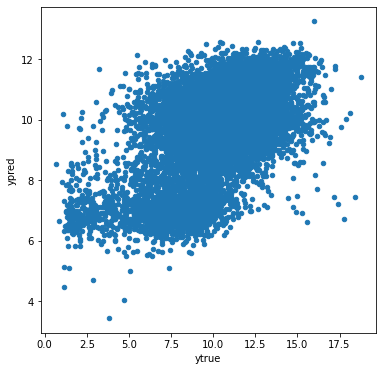

In [18]:
print(r2_score(df_eval2['ytrue'], df_eval2['ypred']))
df_eval2.plot.scatter('ytrue', 'ypred', figsize=(6, 6));

In [19]:
df_eval2.to_csv('../output/oof_kronecker_epi_all.csv', index=False)

In [21]:
!ls -lh ../output/oof_*

-rw-r--r-- 1 igorf samuelbf 835K Feb 13 13:35 ../output/oof_genetic_AD.csv
-rw-r--r-- 1 igorf samuelbf 839K Jan 31 19:25 ../output/oof_kronecker_additive.csv
-rw-r--r-- 1 igorf samuelbf 838K Jan 31 22:25 ../output/oof_kronecker_dominant.csv
-rw-r--r-- 1 igorf samuelbf 839K Feb  1 15:47 ../output/oof_kronecker_epi_AA.csv
-rw-r--r-- 1 igorf samuelbf 837K Feb  1 18:55 ../output/oof_kronecker_epi_AD.csv
-rw-r--r-- 1 igorf samuelbf 838K Feb 13 15:18 ../output/oof_kronecker_epi_all.csv
-rw-r--r-- 1 igorf samuelbf 837K Feb  1 18:17 ../output/oof_kronecker_epi_DD.csv
-rw-r--r-- 1 igorf samuelbf 908K Jan 31 15:32 ../output/oof_solution_4th_sub.csv
